# The bechdel test

<font size="4">

The Bechdel test is a measure of the representation of women in fiction. It asks whether a work features at least two women who talk to each other about something other than a man.

The rules now known as the Bechdel test first appeared in 1985 in Alison Bechdel's comic strip Dykes to Watch Out For. In a strip titled "The Rule", two women discuss seeing a film and one woman explains that she only goes to a movie if it satisfies the following requirements:

1. The movie has to have at least two women in it;
2. The two women talk to each other;
3. They talk about something other than a man.


<img src="images/Intro.jpg" style="width:650px;height:400px;">
    
Passing or failing the test is not necessarily indicative of how well women are represented in any specific work. Rather, the test is used as an indicator for the active presence of women in the entire field of film and other fiction, and to call attention to gender inequality in fiction.
    
As famous examples of movies that **do not pass a single criteria** (At least two named female characters in the movie) we have:
    
1. **Star Wars Episode V: The Empire Strikes Back (1980)** - Leia is the only named female character in the entire movie.
2. **Gravity (2013)** - Altough the main protagonist, played by Sandra Bullock, appears in the entirety of the movie. The fact that there are only three named characters (the other two are men) makes the movie not pass any of the criterias. This movie is usually given as an example of the limitations of the test.
    
<table><tr>
<td> <img src="images/starwarsV.jpg" alt="Drawing" style="height: 500px;"/> </td>
<td> <img src="images/Gravity.jpg" alt="Drawing" style="height: 500px;"/> </td>
</tr></table>
    
Examples of movies that pass only the first criteria: **At least two named female characters, but they don't speak to each other**
    
1. **The Lord of the Rings: The Fellowship of the ring (2001) and TLOR: Return of the king (2003)** - Altough the universe has  named characters such as Eowyn and Galadriel, they don't interact with each other in any of the 379 minutes of these movies.
    
2. **Harry Potter and the Goblet of Fire (2005)** - The only Harry Potter movie in the series that does not pass the test. 
    
  
<table><tr>
<td> <img src="images/lotr.jpg" alt="Drawing" style="height: 500px;"/> </td>
<td> <img src="images/harry_potter.jpg" alt="Drawing" style="height: 500px;"/> </td>
</tr></table>

Next up, movies that pass all the previous criterias but where the **two women talk only about a men**:
1. **Iron Man (2008)** - There is a conversation between 2 of Tony Stark's love interests, where they talk about Tony.
2. **Avatar (2009)** - In two scenes, Neytiri talks to her mother about Jake.
    
<table><tr>
<td> <img src="images/iron_man.jpg" alt="Drawing" style="height: 500px;"/> </td>
<td> <img src="images/avatar.jpg" alt="Drawing" style="height: 500px;"/> </td>
</tr></table>

Finally, for movies that **pass the three criteria**:
1. **City Lights (1931)** - Even though the movies was made in 1931 on the silent era of movies, Chaplin's movie fills all criteria.
2. **The Human Centipede (First Sequence) (2009)** - Before the main events of the movie occur, the characters discuss how they are lost.
    
<table><tr>
<td> <img src="images/city_lights.jpg" alt="Drawing" style="height: 500px;"/> </td>
<td> <img src="images/centipede.jpg" alt="Drawing" style="height: 500px;"/> </td>    
</tr></table>

    
As seen by the mentioned movies, the test is not exactly a measure of how good a single movie represents its female characters. However, by compiling a big list of movies and analyzing a general trend, it may be possible to draw some conclusions about the film industry as a whole. By analyzing a dataset of 8555 movies compiled in https://bechdeltest.com/, the following questions are studied:
 - Has the ratio of movies that pass the Bechdel Test increased over time?
 - Is it possible to see a different ratio of movies that pass the test for different genres of movies?
 - Are movies that pass the Bechdel better rated better by their watchers?
 - Does the gender of the director influence the chance of a movie passing the test?

# The datasets

<br>
 
1. **The Bechdel dataset**
    Available at https://bechdeltest.com/, the dataset was extracted on 08/07/2020 and contains the following information about 8555 movies.
     - Movie title
     - Year
     - Imdb code
     - Bechdel Classfication
<br>    
2. **IMDB movies dataset**
    Available at https://www.kaggle.com/ashirwadsangwan/imdb-dataset, contains:
     - Run time in Minutes
     - Genres
     - Type of the item (movie, short, episode)
     - Average rating in the IMDB site
     - Number of votes in the IMDB site
     
3. **TMDB movies dataset**
    Available at https://www.kaggle.com/rounakbanik/the-movies-dataset/data?select=movies_metadata.csv, with information about 45000 movies, contains:
     - Budget of the movie
     - Revenue
     - Original Language
     - Average rating in the TMDB site
     
4. **Movie casting dataset**
    Available at https://www.kaggle.com/stephanerappeneau/350-000-movies-from-themoviedborg, with information about 35-000 movies, contains:
     - Gender of director
     - Number of directors
     - Gender of 5 main actors
     - Number of producers

# 1. Preprocessing data

In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pathlib
from scipy.stats import ttest_ind_from_stats
from scipy.stats import ttest_ind
import warnings
from IPython.display import Markdown as md
import matplotlib
warnings.filterwarnings('ignore')
sns.set()
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## 1.1 Datasets

In [2]:
#Importing IMDB datasets
file_path = str(pathlib.Path().absolute()) +"\input_datasets\\title.basics.tsv"
df = pd.read_csv(file_path,sep='\t')
file_path = str(pathlib.Path().absolute()) +"\input_datasets\\title.ratings.tsv"
df2 = pd.read_csv(file_path,sep='\t')
df3 = df.merge(df2,on=('tconst'))

md('The IMDB dataset has information about the genre, the release year, the movie rating and duration,'  +\
   'as well as the number of votes. It contains **{}** movies:'.format(len(df3)))

The IMDB dataset has information about the genre, the release year, the movie rating and duration,as well as the number of votes. It contains **993153** movies:

In [3]:
df3.head()

tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

   isAdult startYear endYear runtimeMinutes                    genres  \
0        0      1894      \N              1         Documentary,Short   
1        0      1892      \N              5           Animation,Short   
2        0      1892      \N              4  Animation,Comedy,Romance   
3        0      1892      \N             \N           Animation,Short   
4        0      1893      \N              1              Comedy,Short   

   averageRating  numVotes  
0            5.6      1550  
1            6.1       186  
2            6.5      1207  
3            6.2       113  
4            6.1      1934

In [270]:
#Importing bechdel dataset
file_path = str(pathlib.Path().absolute()) +"\input_datasets\\bechdelV2.csv"
bechdel=pd.read_csv(file_path)
bechdel=bechdel.drop_duplicates(subset='imdb', keep="last")

md('The IMDB datasets contains {} movies:'.format(len(bechdel)))

md('The Bechdel dataset has information about wheter or not the movie passes the test. If the movie does not pass' +\
   'the test, the reason is specified. It contains **{}** movies:'.format(len(bechdel)))

The Bechdel dataset has information about wheter or not the movie passes the test. If the movie does not passthe test, the reason is specified. It contains **8549** movies:

In [5]:
bechdel.head()

Unnamed: 0                                   title  year       imdb  \
0           0                   Roundhay Garden Scene  1888  tt0392728   
1           1                          Pauvre Pierrot  1892  tt0000003   
2           2  Execution of Mary, Queen of Scots, The  1895  tt0132134   
3           3           Tables Turned on the Gardener  1895  tt0000014   
4           4                       Une nuit terrible  1896  tt0000131   

  clean_test binary  
0    nowomen   FAIL  
1    nowomen   FAIL  
2    nowomen   FAIL  
3    nowomen   FAIL  
4    nowomen   FAIL

In [6]:
#Importing TMDB dataset
file_path = str(pathlib.Path().absolute()) +"\input_datasets\\movies_metadata.csv"
the_movie_dataset = pd.read_csv(file_path)

md('The TMDB datasets contains {} movies:'.format(len(the_movie_dataset)))

md('The TMDB dataset has information about the budget and revenue, as well as information such as language and popularity' +\
   '. It contains {} movies:'.format(len(the_movie_dataset)))

The TMDB dataset has information about the budget and revenue, as well as information such as language and popularity. It contains 45466 movies:

In [7]:
the_movie_dataset.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...   
1           Jumanji  When siblings Judy and Peter discover an encha...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...   

  popularity                       poster_path  \
0    21.9469  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1    17.0155  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2    11.7129  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   

                                production_countries release_date  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-10-30   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-15   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   1995-12-22   

       revenue  runtime                                   spoken_languages  \
0  373554033.0     81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0    104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0    101.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   

              title  video  vote_average  vote_count  
0         Toy Story  False           7.7      5415.0  
1           Jumanji  False           6.9      2413.0  
2  Grumpier Old Men  False           6.5        92.0

In [8]:
# Movie casting dataset
#Gender -> 0 - not specified, 1- woman, 2 - men
file_path = str(pathlib.Path().absolute()) +"\input_datasets\\AllMoviesCastingRaw.csv"
movie_casting = pd.read_csv(file_path,sep=';')
file_path = str(pathlib.Path().absolute()) +"\input_datasets\\AllMoviesDetailsCleaned.csv"
movie_casting2 = pd.read_csv(file_path,sep=';')
movie_casting_unified=movie_casting.merge(movie_casting2,on='id',how='outer')[['actor1_gender','actor2_gender','actor3_gender',
                                                                              'actor4_gender','actor5_gender','actor_number',
                                                                              'director_gender','director_number','producer_number',
                                                                              'imdb_id']].rename(columns={'imdb_id':'tconst'})

md('The movie casting dataset has information about the gender of the first 5 actors specified in IMDB, as well as the gender of'+\
   'the director. The gender value assumes values 0, 1 and 2 (unspecified, female, male). It contains **{}** movies.'
   .format(len(the_movie_dataset)))


The movie casting dataset has information about the gender of the first 5 actors specified in IMDB, as well as the gender ofthe director. The gender value assumes values 0, 1 and 2 (unspecified, female, male). It contains **45466** movies.

In [9]:
movie_casting_unified.head()

actor1_gender  actor2_gender  actor3_gender  actor4_gender  actor5_gender  \
0              0            0.0              2              0              0   
1              2            1.0              2              2              0   
2              2            2.0              1              1              1   
3              2            2.0              2              2              2   
4              0            0.0              0              0              0   

   actor_number  director_gender  director_number  producer_number     tconst  
0             4              0.0                1                0  tt0094675  
1             7              0.0                1                1  tt0092149  
2            24              1.0                4                1  tt0113101  
3            15              2.0                1                1  tt0107286  
4             0              0.0                1                2  tt0825671

In [10]:
# adding new column about how many male and how many female actors were specified
# the maximum number is 5. It is implicit the number of actors with non-specified information (5-n_female-n_male)
def count_gender(x,gender):
    columns=['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender']
    return np.sum([x[col]==gender for col in columns])
   
movie_casting_unified['number_female_actors']=movie_casting_unified.apply(lambda x:count_gender(x,1),axis=1)
movie_casting_unified['number_male_actors']=movie_casting_unified.apply(lambda x:count_gender(x,2),axis=1)

# Creating dummy variables on the actor and director gender variables

movie_casting_unified.loc[:, ['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender',
                         'director_gender']]=movie_casting_unified.loc[:, ['actor1_gender','actor2_gender','actor3_gender',
                                                                           'actor4_gender','actor5_gender',
                         'director_gender']].replace(1, 'W')
movie_casting_unified.loc[:, ['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender',
                         'director_gender']]=movie_casting_unified.loc[:, ['actor1_gender','actor2_gender','actor3_gender',
                                                                           'actor4_gender','actor5_gender',
                         'director_gender']].replace(2, 'M')
movie_casting_unified=pd.get_dummies(movie_casting_unified, columns=['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender',
                         'director_gender'],drop_first=True)


In [11]:
#Selecting relevant columns and changing the columns names to a common notation
the_movie_dataset=the_movie_dataset[['imdb_id','budget','original_language','revenue','vote_average']]
the_movie_dataset.rename(columns={'vote_average':'TMDB_vote_avg','imdb_id':'tconst'},inplace=True)
bechdel.rename(columns={'imdb':'tconst'},inplace=True)
#merging
bechdel2 = bechdel.merge(df3,on=('tconst'),how="left")
bechdel2=bechdel2.drop_duplicates(subset='tconst', keep="last")
bechdel3 = bechdel2.merge(the_movie_dataset,on=('tconst'),how="left")
bechdel3=bechdel3.drop_duplicates(subset='tconst', keep="last")
bechdel3 = bechdel3.merge(movie_casting_unified,on=('tconst'),how="left")


bechdel3.drop(['Unnamed: 0'],axis=1,inplace=True) #dropping column
bechdel3['Pass']=bechdel3['binary'].apply(lambda x: x=='PASS')  #Column of 0s or 1s

In [12]:
#Saving file
bechdel3.to_csv(str(pathlib.Path().absolute()) +"\input_datasets\\bechdel_unified.csv",index=False)

In [13]:
#Reloading file
bechdel3=pd.read_csv(str(pathlib.Path().absolute()) +"\input_datasets\\bechdel_unified.csv",sep=',')

In [271]:
#Merging datasets with outer criteria to see how many movies are not present in both datasets
complete_merge_2=pd.merge(bechdel3,df3,on=('tconst'),how="outer",indicator=True)
left_out_2=complete_merge_2[complete_merge_2['_merge']=='left_only']

complete_merge_3=pd.merge(bechdel3,the_movie_dataset,on=('tconst'),how="outer",indicator=True)
left_out_3=complete_merge_3[complete_merge_3['_merge']=='left_only']

complete_merge_4=pd.merge(bechdel3,movie_casting_unified,on=('tconst'),how="outer",indicator=True)
left_out_4=complete_merge_4[complete_merge_4['_merge']=='left_only']


In [272]:
md('By analyzing the different datasets and comparing the data, it was possible to identiy:<br><ol>'+\
  '<li>**{}** movies from bechdel dataset were not present on IMDB dataset</li>'.format(len(left_out_2))+\
  '<li>**{}** movies from bechdel dataset were not present on TMDB dataset</li>'.format(len(left_out_3))+\
  '<li>**{}** movies from bechdel dataset were not present on Casting dataset</li>'.format(len(left_out_4))+\
  '<li>Of all the **{}** movies available on the Bechdel dataset.'.format(len(bechdel3))+\
   ' **{:.1f}**%'.format(bechdel3.mean()['Pass']*100)+\
   ' passed the bechdel test</li></ol>'
  )

By analyzing the different datasets and comparing the data, it was possible to identiy:<br><ol><li>**0** movies from bechdel dataset were not present on IMDB dataset</li><li>**1006** movies from bechdel dataset were not present on TMDB dataset</li><li>**283** movies from bechdel dataset were not present on Casting dataset</li><li>Of all the **7912** movies available on the Bechdel dataset. **57.4**% passed the bechdel test</li></ol>

## 1.2 Feature extraction 

The next step was to process all the columns into readable and interpretable data. The following modifications were made:

- The runtime was divided into 4 different interval classes: movies below 90 minutes, movies between 90 and 105 minutes, movies between 105 and 120 minutes, movies above 120 minutes.
- The release year was divided by decades.
- The TMDB and IMDB rating was divided in 6 different intervals.
- The budget was divided in 5 intervals.
- A variable of profit over budget was created and divided in intervals.
- Entries that had a 'tytleType' other than 'movie' were filtered out (VideoGames, series, shorts were included in the Bechdel dataset). The remaining dataset had **7912** entries.
- Variables related to actor and director gender were converted into dummy variables.
- Variables related to movie genre were converted into dummy variables. A movie could have more than on genre.

The final dataset which will be analyzed is shown below:

In [19]:
bechdel3.drop(['primaryTitle', 'originalTitle','isAdult','startYear','endYear'], axis=1,inplace=True)

#Cleaning the runtimecolumn by substituting the NaN values and other non numeric information to -1
bechdel3['runtimeMinutes']=bechdel3['runtimeMinutes'].fillna(-1)
bechdel3['runtimeMinutes']=bechdel3['runtimeMinutes'].replace('\\N', -1)
bechdel3["runtimeMinutes"] = pd.to_numeric(bechdel3["runtimeMinutes"])

#Adding run time length subclasses
bins = [0,90, 105, 120,10000]
labels = ['<90 min','90 - 105min','105 - 120 min','>120min']
bechdel3['runtimeMinutes_binned'] = pd.cut(bechdel3['runtimeMinutes'], bins=bins, labels=labels)

#Adding decade subclasses
bins=[0,1940,1950,1960,1970,1980,1990,2000,2010,2020]
bechdel3["year"] = pd.to_numeric(bechdel3["year"])
labels=['before 40s','40s','50s','60s','70s','80s','90s','2000s','2010s']
bechdel3['decade_bins'] = pd.cut(bechdel3['year'], bins=bins, labels=labels)

#Adding IMDB and TMDB average vote subclasses
bins=[0,6,6.5,7,7.5,8,10]
bechdel3['TMDB_vote_avg']=bechdel3['TMDB_vote_avg'].fillna(-1)
labels=['<6','6 to 6.5','6.5 to 7','7 to 7.5','7.5 to 8','8 to 10']
bechdel3['TMDB_rating_bins'] = pd.cut(bechdel3['TMDB_vote_avg'], bins=bins, labels=labels)

bins=[0,6,6.5,7,7.5,8,10]
bechdel3['averageRating']=bechdel3['averageRating'].fillna(-1)
labels=['<6','6 to 6.5','6.5 to 7','7 to 7.5','7.5 to 8','8 to 10']
bechdel3['rating_bins'] = pd.cut(bechdel3['averageRating'], bins=bins, labels=labels)

#Cleaning budget and revenue columns, creating budget classes
bechdel3['budget']=bechdel3['budget'].fillna(-1)
bechdel3["budget"] = pd.to_numeric(bechdel3["budget"])
bechdel3['budget']=bechdel3['budget'].replace(0, -1)
bechdel3['revenue']=bechdel3['revenue'].fillna(-1)
bechdel3["revenue"] = pd.to_numeric(bechdel3["revenue"])
bechdel3['revenue']=bechdel3['revenue'].replace(0, -1)

bins=[0,10**7,2.5*10**7,5*10**7,10**8,10**10]
labels = ['< 10^7','10^7 - 2.5*10^7','2.5*10^7- 5*10^7','5*10^7 - 10^8','>10^8']
bechdel3['budget_binned'] = pd.cut(bechdel3['budget'], bins=bins, labels=labels)

In [20]:
#For movies that have a revenue and budget greater than 1000 (Lots of movies in the dataset had revenue and budget equal to 0
# or other small values that didn't make sense), calculate the percentage of profit (revenue-budget) over budget

def profit_over_budget(revenue,budget):
    if budget>10000:
        if revenue>10000:
                return (revenue-budget)/budget*100
    return -100
bechdel3['profit_over_budget']=bechdel3.apply(lambda x:profit_over_budget(x['revenue'],x['budget']),axis=1)

In [22]:
#Separating % of profit over budget in groups
bins=[-100,-50,0,50,100,150,200,300,500,1000,10000000]
labels = ['-100% to -50%','-50% to 0%','0% to 50%','50% to 100%','100% to 150%','150% to 200%','200% to 300%','300% to 500%','500% to 1000%','more than 1000%']
bechdel3['profit_over_budget_binned'] = pd.cut(bechdel3['profit_over_budget'], bins=bins, labels=labels)


In [23]:
#Cleaning genres column
bechdel3['genres']=bechdel3['genres'].fillna('no_info')
bechdel3['genres']=bechdel3['genres'].replace('\\N', 'no_info')

In [24]:
#Finding all different genres given by IMDB
Genres=[]
for movie_id in range(len(bechdel3)):
    genre_of_movie=(list(bechdel3['genres'])[movie_id]).split(',')
    for genre in genre_of_movie:
        if genre not in Genres:
            Genres.append(genre)
#print(Genres)

In [25]:
#Creates a column of each of the genres - the column value is 1 if the movie belongs to the genre
for genre in Genres:
    bechdel3[genre]=bechdel3['genres'].apply(lambda x: 1 if genre in x else 0)

In [29]:
bechdel3=bechdel3[bechdel3['titleType']=='movie'].dropna(subset=['titleType'])
#select only movies, not other forms of media
#print('Final amount of samples to be analysed after preprocessing: {}'.format(len(bechdel3)))
bechdel3[bechdel3['Romance']==1].sort_values('numVotes',ascending=False).head()

title  year     tconst clean_test  \
2558                           Forrest Gump  1994  tt0109830     notalk   
2837                                Titanic  1997  tt0120338         ok   
3979  Eternal Sunshine of the Spotless Mind  2004  tt0338013        men   
2906                      Good Will Hunting  1997  tt0119217    nowomen   
4868                    Slumdog Millionaire  2008  tt1010048     notalk   

     binary titleType  runtimeMinutes                genres  averageRating  \
2558   FAIL     movie             142         Drama,Romance            8.8   
2837   PASS     movie             194         Drama,Romance            7.8   
3979   FAIL     movie             108  Drama,Romance,Sci-Fi            8.3   
2906   FAIL     movie             126         Drama,Romance            8.3   
4868   FAIL     movie             120         Drama,Romance            8.0   

       numVotes       budget original_language       revenue  TMDB_vote_avg  \
2558  1662609.0   55000000.0                en  6.779454e+08            8.2   
2837   980721.0  200000000.0                en  1.845034e+09            7.5   
3979   844488.0   20000000.0                en  7.225813e+07            7.9   
2906   790122.0   10000000.0                en  2.259334e+08            7.9   
4868   759588.0   15000000.0                en  3.779105e+08            7.6   

      actor_number  director_number  producer_number  number_female_actors  \
2558          67.0              1.0              3.0                   2.0   
2837         136.0              1.0              2.0                   3.0   
3979          19.0              1.0              2.0                   2.0   
2906          51.0              1.0              1.0                   1.0   
4868          15.0              2.0              1.0                   1.0   

      number_male_actors  actor1_gender_M  actor1_gender_W  actor2_gender_M  \
2558                 3.0              1.0              0.0              0.0   
2837                 2.0              0.0              1.0              1.0   
3979                 3.0              1.0              0.0              0.0   
2906                 4.0              1.0              0.0              1.0   
4868                 3.0              1.0              0.0              0.0   

      actor2_gender_W  actor3_gender_M  actor3_gender_W  actor4_gender_M  \
2558              1.0              1.0              0.0              1.0   
2837              0.0              0.0              1.0              1.0   
3979              1.0              0.0              1.0              1.0   
2906              0.0              1.0              0.0              1.0   
4868              1.0              1.0              0.0              0.0   

      actor4_gender_W  actor5_gender_M  actor5_gender_W  director_gender_M  \
2558              0.0              0.0              1.0                1.0   
2837              0.0              0.0              1.0                1.0   
3979              0.0              1.0              0.0                1.0   
2906              0.0              0.0              1.0                1.0   
4868              0.0              1.0              0.0                1.0   

      director_gender_W   Pass runtimeMinutes_binned decade_bins  \
2558                0.0  False               >120min         90s   
2837                0.0   True               >120min         90s   
3979                0.0  False         105 - 120 min       2000s   
2906                0.0  False               >120min         90s   
4868                0.0  False         105 - 120 min       2000s   

     TMDB_rating_bins rating_bins    budget_binned  profit_over_budget  \
2558          8 to 10     8 to 10    5*10^7 - 10^8         1132.627998   
2837         7 to 7.5    7.5 to 8            >10^8          822.517094   
3979         7.5 to 8     8 to 10  10^7 - 2.5*10^7          261.290630   
2906         7.5 to 8     8 to 10           < 10^7         2159.3343

In [30]:
#Create a dataset of only movies of the 2000s - This list is going to be useful later
bechdel3_only_2000s=bechdel3[bechdel3['year']>1999]
bechdel3_before_2000s=bechdel3[bechdel3['year']<=1999]


In [31]:
#Plot function that will be used later on to plot barplots
def plot_stacked(df,bin_column,bin_names,xlabel,Title):
    df_plot = df.groupby(['clean_test', bin_column]).size().reset_index().pivot(columns='clean_test', index=bin_column, values=0)
    r= list(range(len(bin_names)))
    barWidth = 1
    plt.close()
    matplotlib.style.use('default')
    fig,ax=plt.subplots(1,1,figsize=(18,7))
    plt.bar(r, df_plot['ok'], color='blue', edgecolor='white', width=barWidth,zorder=100,alpha=0.8)
    plt.bar(r, df_plot['men'], bottom=df_plot['ok'], color='yellow', edgecolor='white', width=barWidth,zorder=100,alpha=0.8)
    plt.bar(r, df_plot['notalk'], bottom=df_plot['ok']+df_plot['men'], color='orange', edgecolor='white', width=barWidth,
            zorder=100,alpha=0.8)
    plt.bar(r, df_plot['nowomen'], bottom=df_plot['ok']+df_plot['men']+df_plot['notalk'], color='r', edgecolor='white', 
            width=barWidth,zorder=100,alpha=0.8)

    # Custom X axis
    plt.xticks(r, bin_names, fontweight='bold')
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel('Count per Category',fontsize=20)
    l=plt.legend(['Passes test','They talk only about men','The two women dont talk with each other','There are not two women'])
    l.set_zorder(101)
    plt.title(Title,fontsize=30)
    plt.grid(which='major',axis='y',linewidth=1,linestyle='--',color='black')
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
    # Show graphic
    plt.show();

In [32]:
#Plot function that will be used later on to plot barplots
def plot_stacked_100(df,bin_column,bin_names,xlabel,Title):
    df_plot = df.groupby(['clean_test', bin_column]).size().reset_index().pivot(columns='clean_test', index=bin_column, values=0)
    df_plot['total']=0
    for index, row in df_plot.iterrows():
        if row.sum()==0:
            df_plot['total'][index]=1
        else:
            df_plot['total'][index]=(row.sum())
    df_plot['%men']=df_plot['men']/(df_plot['total'])*100
    df_plot['%notalk']=df_plot['notalk']/(df_plot['total'])*100
    df_plot['%nowomen']=df_plot['nowomen']/(df_plot['total'])*100
    df_plot['%ok']=df_plot['ok']/(df_plot['total'])*100
    r= list(range(len(bin_names)))
    barWidth = 1

    fig,ax=plt.subplots(1,1,figsize=(18,7))
    plt.bar(r, df_plot['%ok'], color='blue', edgecolor='white', width=barWidth,zorder=100,alpha=0.8)
    plt.bar(r, df_plot['%men'], bottom=df_plot['%ok'], color='yellow', edgecolor='white', width=barWidth,zorder=100,alpha=0.8)
    plt.bar(r, df_plot['%notalk'], bottom=df_plot['%ok']+df_plot['%men'], color='orange', edgecolor='white', width=barWidth,
           zorder=100,alpha=0.8)
    plt.bar(r, df_plot['%nowomen'], bottom=df_plot['%ok']+df_plot['%men']+df_plot['%notalk'], color='r', edgecolor='white',
            width=barWidth,zorder=100,alpha=0.8)

    # Custom X axis
    plt.xticks(r, bin_names, fontweight='bold')
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("% in each category of bechdel test",fontsize=20)
    l=plt.legend(['Passes test','They talk only about men','The two women dont talk with each other','There are not two women'])
    l.set_zorder(101)
    plt.title(Title,fontsize=30)
    plt.grid(which='major',axis='y',linewidth=1,linestyle='--',color='black')
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
    # Show graphic
    plt.show()           

# 1.3 Overview of the interactions between variables

<font size="4">

Before jumping to the analysis, it is important to see how each variable interacts with each other so it is possible to understand wheter the effect is related to the bechdel result or to another variable.

From the correlation plot below:
1. As expected, the number of actors by gender, as well as the gender of the main actor have a big impact in predicting whether a movie passes or not the test. The gender of the director also seems like an interesting effect to explore.
2. The influence of the year of the movie and the average rating are worth analyzing - they have the second biggest correlation to whether or not a movie passes.
3. The revenue and budget,as expected, are very correlated. The amount of reviews a movie receives is also linked to these factors.
4. There is a negative correlation between year of the movie and average rating - This may indicate that the older movies in the Bechdel list are more well received ones. This makes sense, as the submissions to https://bechdeltest.com/ are recent and the submitters may not be interested in low rated old movies.

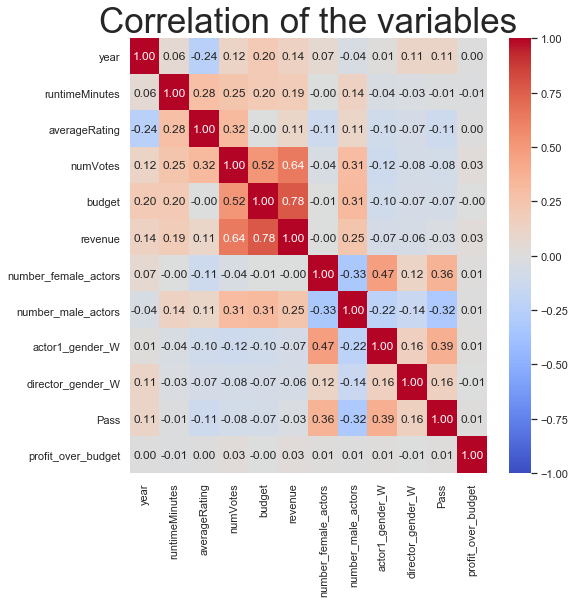

In [33]:
#Correlation plot of the interaction between the different features
fig, ax = plt.subplots(figsize=(8,8))
correlation_matrix=bechdel3.drop(['News','no_info','Short','Adult','Sport','Music','Western','Sci-Fi','Mystery','Biography',
                                 'Family','Fantasy','History','Documentary','Crime','Horror','Comedy','Action',
                                  'Adventure','Film-Noir','Drama','Comedy','War','Musical','Thriller','Animation',
                                  'TMDB_vote_avg','director_number','producer_number','actor2_gender_M','actor2_gender_W',
                                 'actor3_gender_M','actor3_gender_W','actor4_gender_M','actor4_gender_W',
                                 'actor5_gender_M','actor5_gender_W','actor1_gender_M','director_gender_M','Romance','actor_number'],axis=1)
ax=sns.heatmap(correlation_matrix.corr(),cmap='coolwarm',annot=True,vmin=-1,fmt='.2f')
plt.yticks(rotation=0) 
ax.set_title('Correlation of the variables', fontsize=35, fontdict={});


# 2. Analysis of the influence of the release Year on the Bechdel score

<font size="4">


From the graphs it is possible to see that there are much more movies in the dataset that came recently. This happens because the bechdeltest site submissions are more recent.
    <br>
<br>By applying this logic, it is possible to see why older movies had a higher average rating: The list tends to include the most memorable older movies, while not so good movies may not have been watched by the users that submit to bechdeltest.com
    <br><br>
    Finally, another interesting thing is that the Pass percentage got higher as years passed.

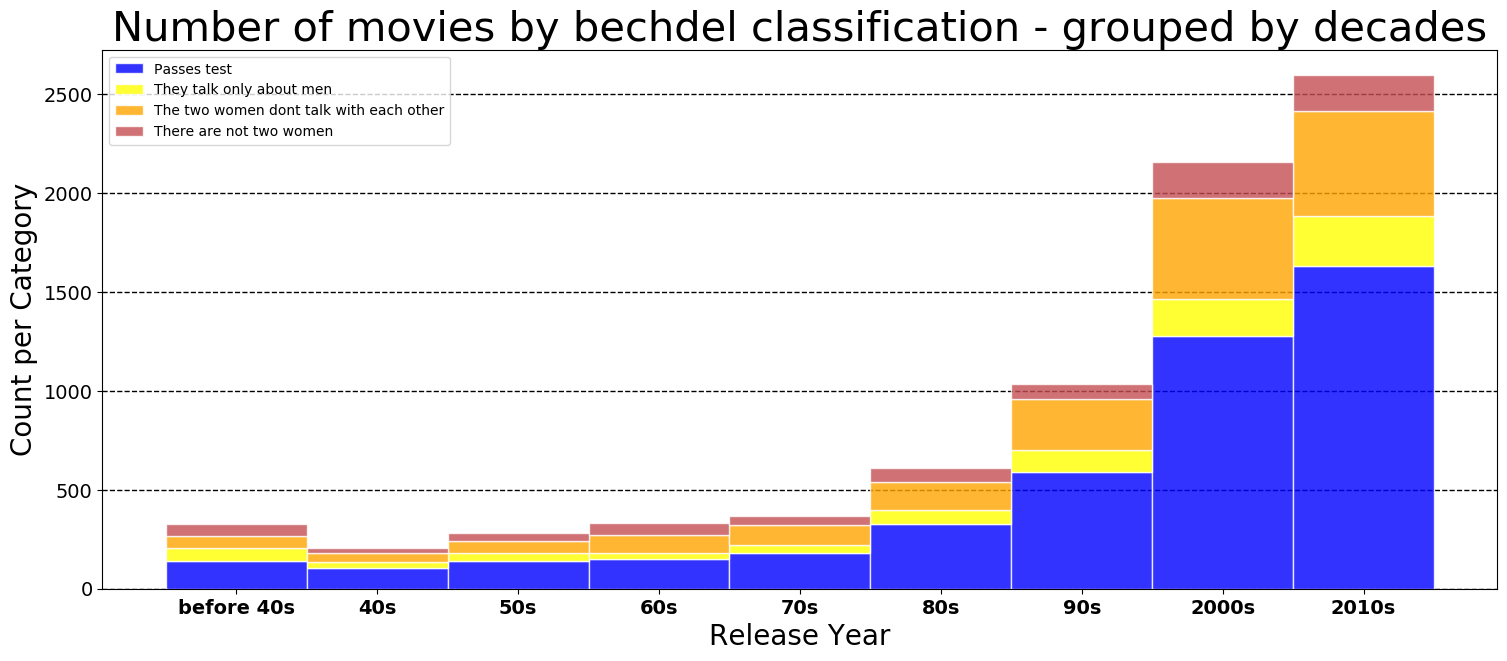

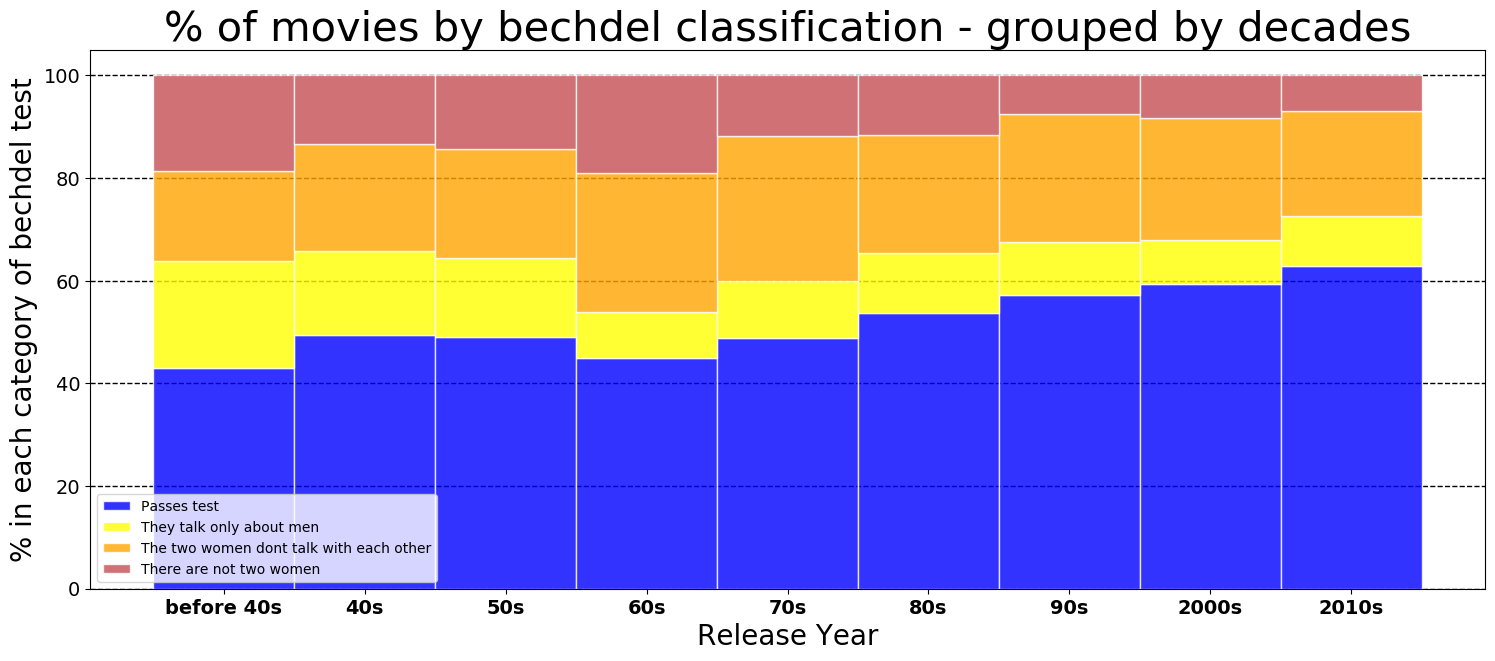

In [34]:
f, axes = plt.subplots(2, figsize=(20, 20))

plot_stacked(bechdel3,'decade_bins',['before 40s','40s','50s','60s','70s','80s','90s','2000s','2010s'],'Release Year','Number of movies by bechdel classification - grouped by decades')
plot_stacked_100(bechdel3,'decade_bins',
            ['before 40s','40s','50s','60s','70s','80s','90s','2000s','2010s'],'Release Year','% of movies by bechdel classification - grouped by decades')

# 3. Analysis of the influence of the Genre on the Bechdel score

<font size="4.5">

It is possible to see a clear influence of the Genre of the movie in the Bechdel pass percentage: While Romances pass the test 65% of the time, Western movies only pass 20% of the time.

In [36]:
d = []
Genres.remove('no_info')
#72 items removed that were not in the IMDB dataset

#Creating a new 'genre' column for each genre
for genre in Genres:
    total = bechdel3[genre].sum()
    passes=bechdel3[bechdel3['binary']=='PASS'][genre].sum()
    pctg=passes/total
    d.append({'Genre':genre,
             'number of movies':total,
             'number that pass':passes,
             '% that pass':pctg})
by_genres = pd.DataFrame(d).sort_values(by=['% that pass'])

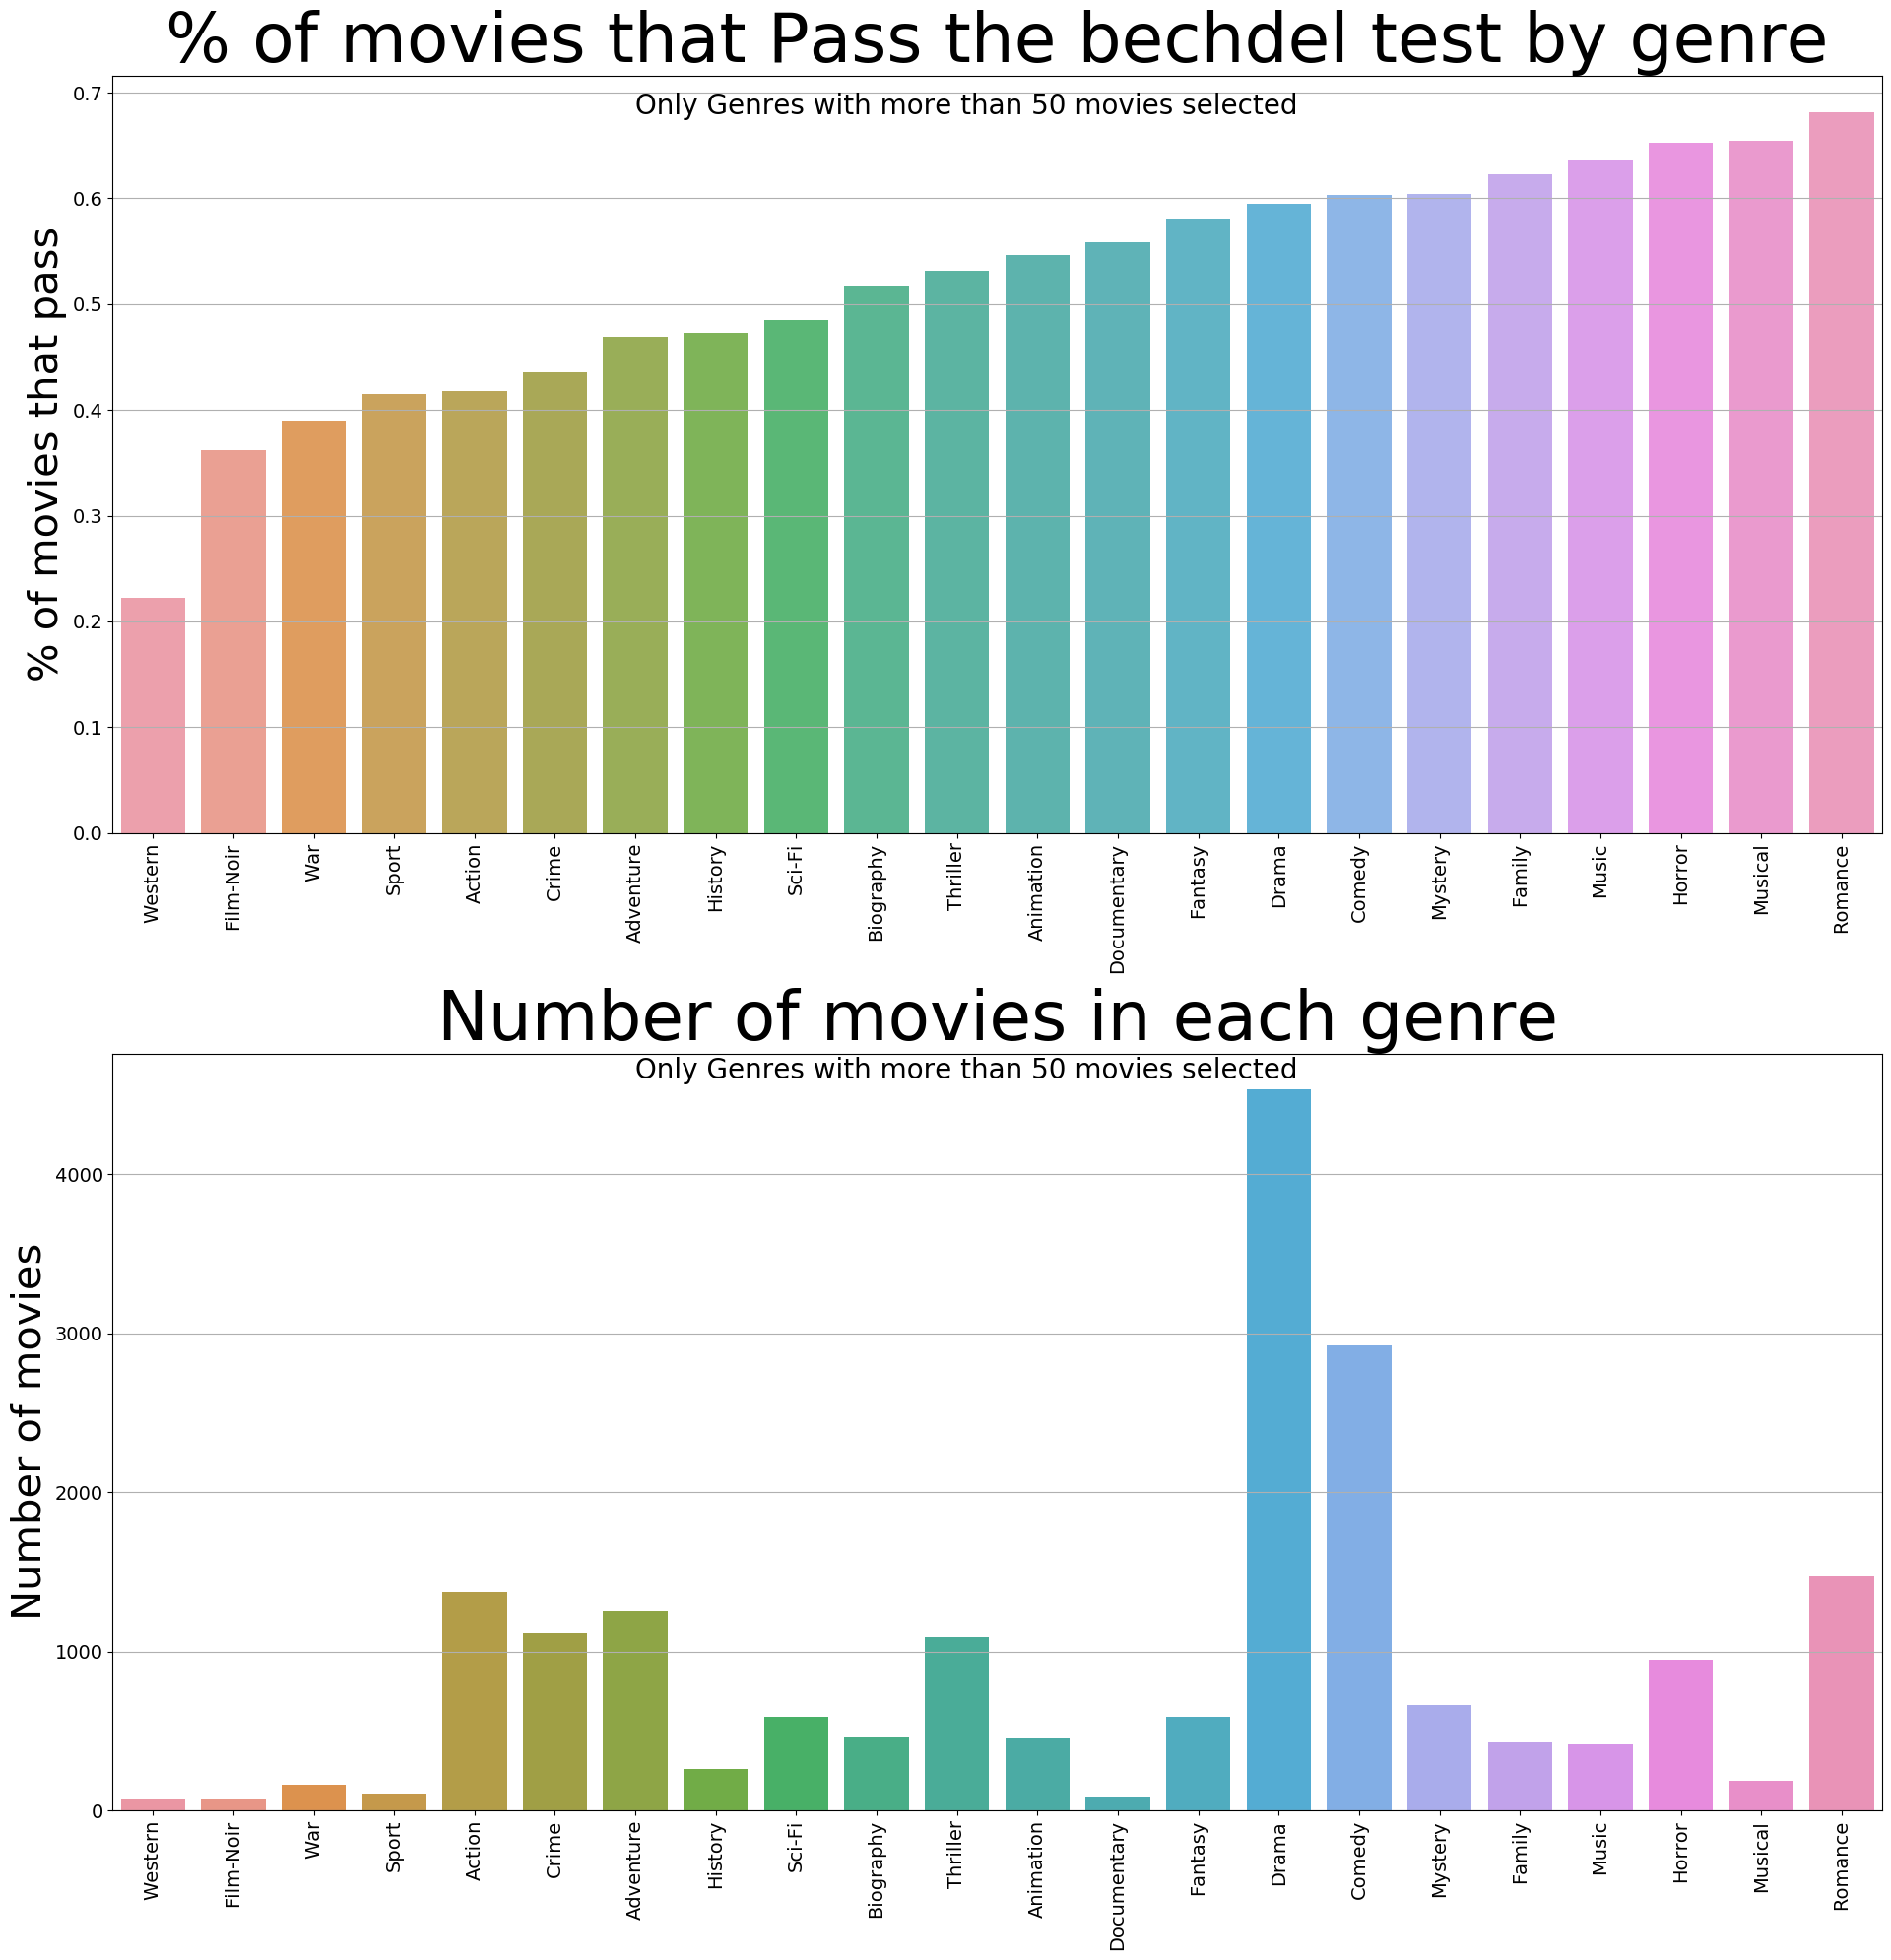

In [37]:
#Plotting the pass probability by movie genre
f, axes = plt.subplots(2, figsize=(20, 20))

b=sns.barplot(x='Genre',y='% that pass',data=by_genres[by_genres['number of movies']>50], ax=axes[0],alpha=0.9)
b.axes.set_title("% of movies that Pass the bechdel test by genre",fontsize=50)
b.set_ylabel("% of movies that pass",fontsize=30)
b.set_xlabel('',color='white')

b.tick_params(labelsize=9)
b.text(6, 0.68,'Only Genres with more than 50 movies selected', fontsize=20)
axes[0].yaxis.grid()

c=sns.barplot(x='Genre',y='number of movies',data=by_genres[by_genres['number of movies']>50], ax=axes[1])

c.axes.set_title("Number of movies in each genre",fontsize=50)
c.set_ylabel("Number of movies",fontsize=30)
c.set_xlabel('',color='white')
c.tick_params(labelsize=9)
c.text(6, 4600,'Only Genres with more than 50 movies selected', fontsize=20);
axes[1].yaxis.grid()

for tick in axes[1].xaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
            tick.label.set_rotation('vertical')
for tick in axes[0].xaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
            tick.label.set_rotation('vertical')
for ax in axes:
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 

plt.tight_layout()

In [38]:
#Function to calculate how many % of movies that did not pass can be attributed to each criteria
def countplot_by_genre_without_pass(df,genre_list):
    df_not_pass=df[df['clean_test']!='ok']
    new_df=[]
    for genre in genre_list:
        counts=df_not_pass[(df_not_pass[genre]==1)].groupby(['clean_test']).count()['title']
        new_df.append(counts)
    new_df=pd.DataFrame(new_df)
    new_df.index = genre_list
    new_df['total']=0
    for index,row in new_df.iterrows():
        new_df['total'][index]=row.sum()
    new_df['%men']=new_df['men']/(new_df['total'])*100
    new_df['%notalk']=new_df['notalk']/(new_df['total'])*100
    new_df['%nowomen']=new_df['nowomen']/(new_df['total'])*100

    r= list(range(len(genre_list)))
    barWidth = 1

    fig,ax=plt.subplots(figsize=(25,10));
    _=plt.bar(r, new_df['%men'], color='yellow', edgecolor='white', width=barWidth,alpha=0.7);
    _=plt.bar(r, new_df['%notalk'],bottom=new_df['%men'], color='orange', edgecolor='white', width=barWidth,alpha=0.7);
    _=plt.bar(r, new_df['%nowomen'],bottom= new_df['%men']+new_df['%notalk'], color='r', edgecolor='white', width=barWidth,alpha=0.7);

    # Custom X axis
    _=plt.xticks(r, genre_list);
    _=plt.xlabel('Movie Genre',fontsize=18);
    _=plt.ylabel("% in each category of bechdel test",fontsize=18);
    _=plt.legend(['They talk only about men','The two women dont talk with each other','There are not two women'],prop={'size': 14});
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(14) 
            tick.label.set_rotation('vertical')
    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
            
    #plt.legend(prop={'size': 6})

    # Show graphic
    plt.show();
    return(new_df)

<font size="4.5">

Analyzing the reasons why each genre does not pass, it is possible to see that movies such as Documentaries, War and Western usually didn't pass because there were not two named female characters in them. 
    
On the other hand, movies such as Romance and Musical most frequently did not pass because the women only talked about other men.

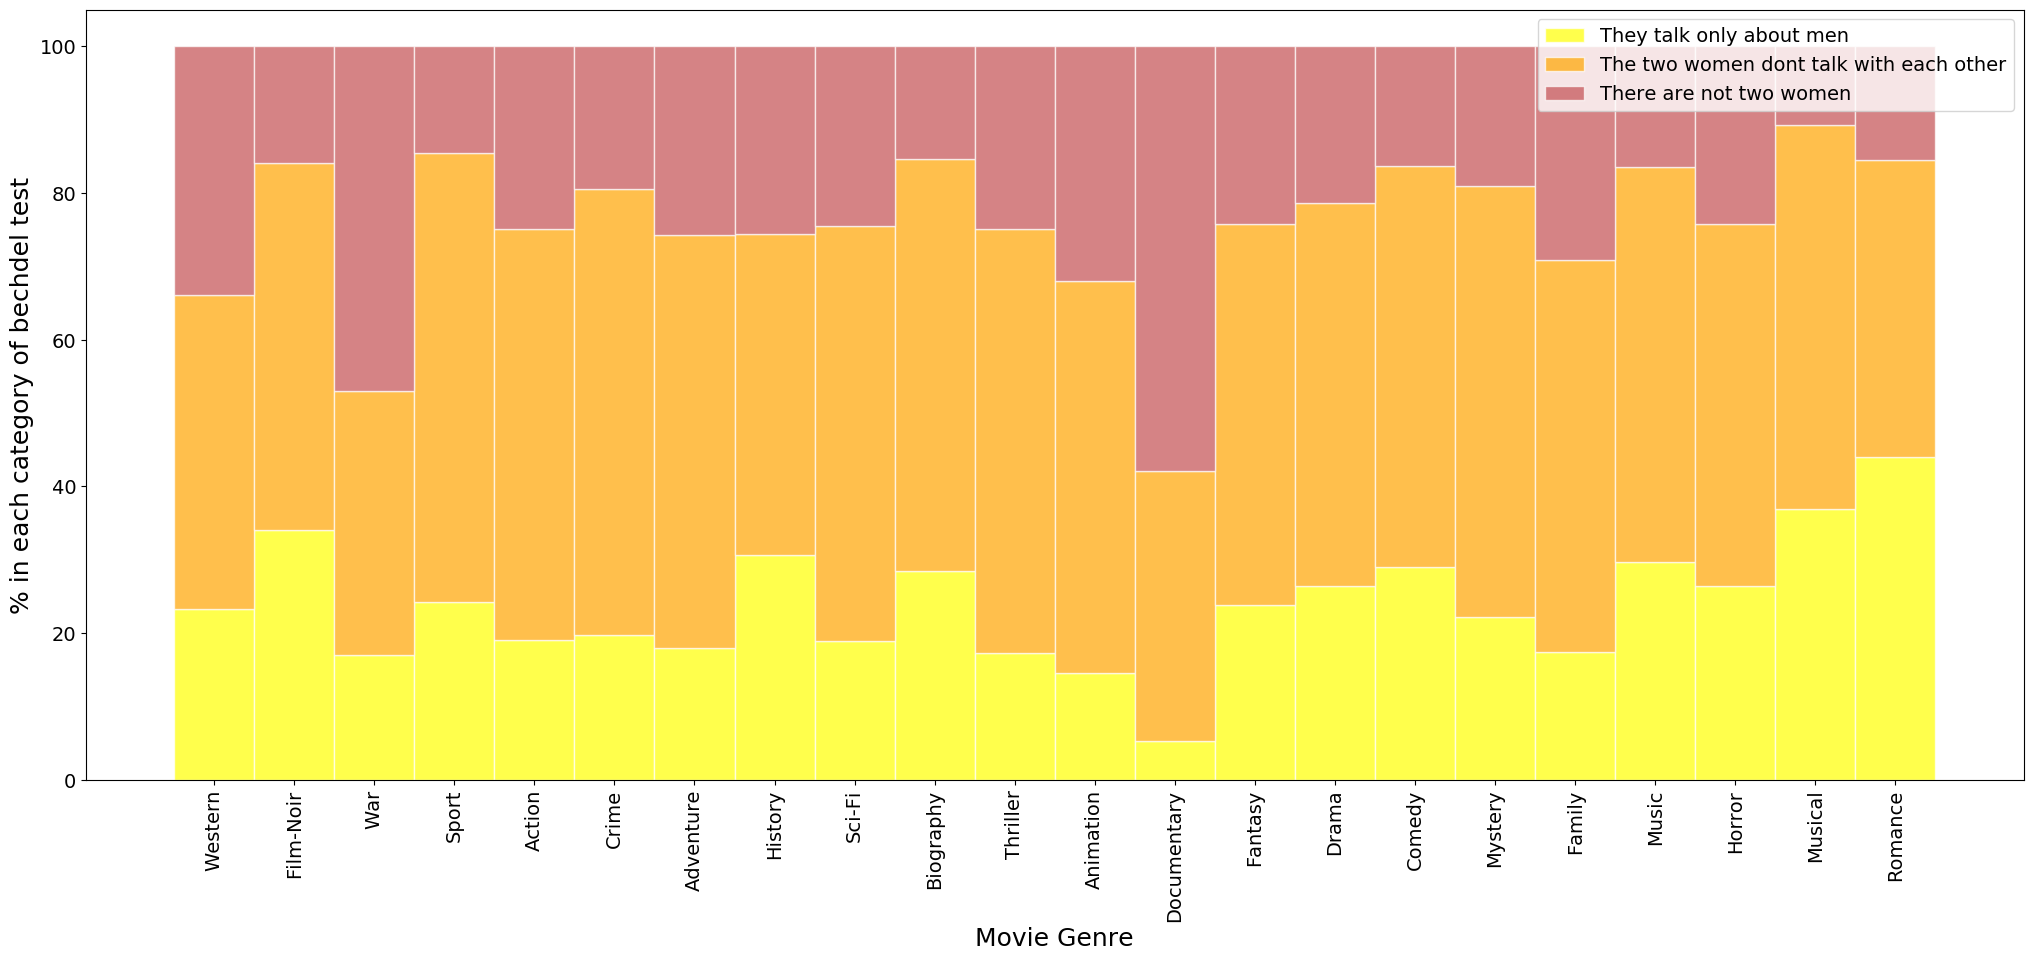

In [39]:
Genres_50_movies=by_genres[by_genres['number of movies']>50]['Genre']
countplot_by_genre_without_pass(bechdel3,list(Genres_50_movies));


# 4. Analysis of the compound influence of year and genre


Now that it is known that both the release date and the genre of the movie are good at identifying if a movie passes the test, it is interesting to see the interaction between both. Have all genres had the Pass probability increased over the years?

In [273]:
md('To analyze this, the dataset was divided in movies which came before 2000'+\
   ' ({} movies) and movies which came after 2000 ({} movies). The graph below shows how the percentage of movies that '.format(len(bechdel3_only_2000s),len(bechdel3_before_2000s))+\
   'pass the test has changed between the two release date groups.')

To analyze this, the dataset was divided in movies which came before 2000 (4879 movies) and movies which came after 2000 (3033 movies). The graph below shows how the percentage of movies that pass the test has changed between the two release date groups.

In [41]:
# Filtering movie genres that have less than 50 total movies in the after 2000s dataset
d=[]
for genre in Genres:
    total = bechdel3_only_2000s[genre].sum()
    passes=bechdel3_only_2000s[bechdel3_only_2000s['binary']=='PASS'][genre].sum()
    pctg=passes/total
    d.append({'Genre':genre,
             'number of movies':total,
             'number that pass':passes,
             '% that pass':pctg})
by_genres2 = pd.DataFrame(d).sort_values(by=['% that pass'])
by_genres2['ratio_200s_movies']=by_genres2[by_genres2['number of movies']>50]['number of movies']/by_genres[by_genres['number of movies']>50]['number of movies']
by_genres2['ones']=1

# Filtering movie genres that have less than 50 total movies in the before 2000s dataset

d=[]
for genre in Genres:
    total = bechdel3_before_2000s[genre].sum()
    passes=bechdel3_before_2000s[bechdel3_before_2000s['binary']=='PASS'][genre].sum()
    pctg=passes/total
    d.append({'Genre':genre,
             'number of movies':total,
             'number that pass':passes,
             '% that pass':pctg})
by_genres3 = pd.DataFrame(d).sort_values(by=['% that pass'])
by_genres3['ratio_200s_movies']=by_genres3[by_genres3['number of movies']>50]['number of movies']/by_genres[by_genres['number of movies']>50]['number of movies']
by_genres3['ones']=1

# Ordering the genres of both datasets according to genre pass probability (before 2000 movies)


Genres_2=list(by_genres2[by_genres2['number of movies']>50]['Genre'])
Genres_1=list(by_genres3[by_genres3['number of movies']>50]['Genre'])

Genre_order=[]
for genre in Genres_1:
    if genre in Genres_2:
        Genre_order.append(genre)
        
# Getting total number of movies by genre and release date group
count_movies={'Genre':[],'before_2000':[],'after_2000':[]}
for genre in Genre_order:
    count_movies['Genre'].append(genre)
    count_movies['before_2000'].append(bechdel3_before_2000s[genre].sum())
    count_movies['after_2000'].append(bechdel3_only_2000s[genre].sum())
df=pd.DataFrame.from_dict(count_movies)

df=df.set_index('Genre')
arr=df.values
vmin,vmax=arr.min(),arr.max()


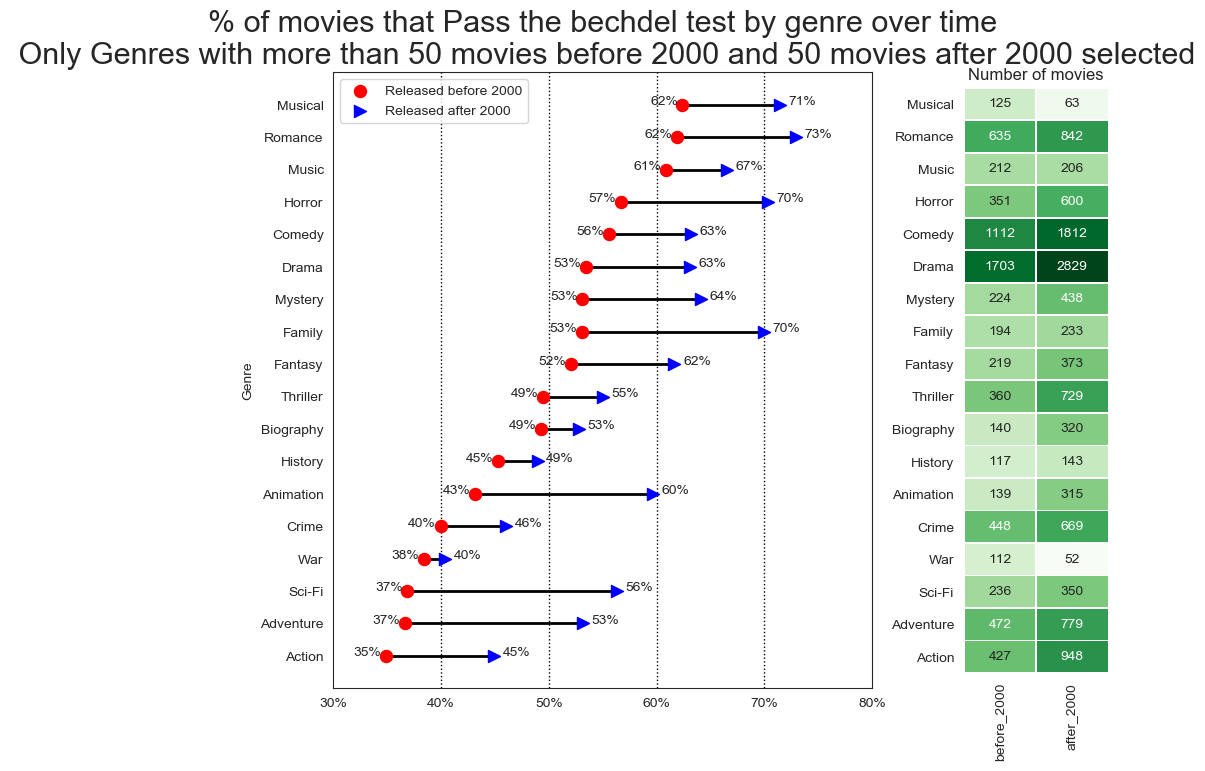

In [45]:
import matplotlib.lines as mlines
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
sns.set_style('white')

#Function to add line between two points
def newline(p1, p2,ax):
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='black',zorder=1,linewidth=2)
    ax.add_line(l)
    return l

# Figure and Axes
#fig, axs = plt.subplots(1,2,figsize=(14,14),  dpi= 80)
plt.figure(figsize=(10,8))
gspec= gridspec.GridSpec(80,10)
left_ax= plt.subplot(gspec[:,:7])
right_ax=plt.subplot(gspec[2:78,8:])
axs=[left_ax,right_ax]
# Vertical Lines
axs[0].vlines(x=.40, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
axs[0].vlines(x=.50, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
axs[0].vlines(x=.60, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
axs[0].vlines(x=.70, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')


# Points
df_after=by_genres2[by_genres2['Genre'].isin(Genre_order)]
df_before=by_genres3[by_genres3['Genre'].isin(Genre_order)]

axs[0].scatter(y=df_before['Genre'], x=df_before['% that pass'], s=75, color='red', alpha=1,zorder=2,label='Released before 2000',marker='o')
axs[0].scatter(y=df_after['Genre'], x=df_after['% that pass'], s=75, color='blue', alpha=1,zorder=2,label='Released after 2000',marker='>')
axs[0].legend(loc=2)

df_unified=df_before.merge(df_after,on='Genre',how='outer')
#Line Segments
for i, p1, p2 in zip(df_unified['Genre'], df_unified['% that pass_x'], df_unified['% that pass_y']):
    newline([p1, i], [p2, i],axs[0])
axs[0].set_facecolor('#f7f7f7')
axs[0].set_title("% of movies that Pass the bechdel test by genre over time\n Only Genres with more than 50 movies before 2000 and 50 movies after 2000 selected", fontdict={'size':22})
axs[0].set(xlim=(0.3,0.8), ylim=(-1, 18), ylabel='Genre')
axs[0].set_xticks([.3,.4,.5,.6,.7,.8])
axs[0].set_xticklabels(['30%', '40%','50%','60%','70%','80%'])

#Adding annotations
for i, txt in enumerate(df_unified['% that pass_x']):
    axs[0].annotate('{:.0f}%'.format(txt*100), (df_unified.iloc[i]['% that pass_x']-0.03, df_unified.iloc[i]['Genre']))
for i, txt in enumerate(df_unified['% that pass_y']):
    axs[0].annotate('{:.0f}%'.format(txt*100), (df_unified.iloc[i]['% that pass_y']+0.008, df_unified.iloc[i]['Genre']))
axs[0].set_facecolor("white")

#Heatmap with total number of movies by group
sns.heatmap(df.iloc[::-1], annot=True, fmt="d", norm=LogNorm(vmin=vmin, vmax=vmax), cmap='Greens',ax=axs[1],
            linewidths=.5,linecolor='white',cbar=False)
plt.title('Number of movies')
plt.tight_layout()
plt.ylabel('',color='white')
plt.show()

<font size="4.5">
From the graph, it is possible to conclude:<br>
    
- The pass rate for all genres has gone up.
    
- Horror, Adventure, Sci-Fi, Animation and Family have risen enough to change positions with other genre.

- The genres with the highest change were: Sci-Fi, Animation, Family and Adventure.

However, it must be analyzed if these percentages are statistically signigicant to conclude if the pass percentage has changed between the two periods. To study this, a binary t-test was performed for each genre.
    
A t-test is a type of inferential statistic used to determine if there is a significant difference between the mean of two groups, it depends on the mean and variance of the two groups and in the number of samples present in each of the two groups.
    
The t-test starts by assuming a null hypothesis that the two means are equal. It then calculates the p-value.
    
The p-value is the evidence against a null hypothesis. The smaller the p-value, the stronger the evidence that the null hypothesis should be rejected. The p-value can be interpreted as the probability that the difference verified between the two groups is just random.

The p-value is then  compared to a significance level $\alpha$ selected by the analyst. If the p-value is lower than the significance, the null-hypothesis is rejected and it is possible to say with a (1-$\alpha$) confidence that the difference between the two means is relevant.
        
For this study, the significance $\alpha$ was adopted as being equal to 0.05. The p-value for each genre is shown below.
    
Genres in blue have a p-value lower than $\alpha$ and it is possible to say there is a difference in the probability of passing between movies that came before 2000 and movies that came after 2000.

Genres in red have a p-value above $\alpha$ and it is not possible to say that the probability of passing has changed.

In [46]:
# Calculate p_value for a binary t-test
def p_value_period(df_pre,df_pos,genre):
    
    total_negatives_pre,total_positives_pre=df_pre[df_pre[genre]==1].groupby([genre,'Pass']).count()['title']
    total_negatives_pos,total_positives_pos=df_pos[df_pos[genre]==1].groupby([genre,'Pass']).count()['title']

    total_pre=total_negatives_pre+total_positives_pre
    total_pos=total_negatives_pos+total_positives_pos

    p_pre=total_positives_pre/total_pre
    p_pos=total_positives_pos/total_pos

    var_pre=p_pre*(1-p_pre)
    var_pos=p_pos*(1-p_pos)

    statistic,pvalue=ttest_ind_from_stats(mean1=p_pre, std1=np.sqrt(var_pre), nobs1=total_pre,
                         mean2=p_pos, std2=np.sqrt(var_pos), nobs2=total_pos)
    return pvalue


In [47]:
#Calculating the p-value for each genre test

p_values={'Genre':[],'p_value':[]}
for genre in Genre_order:
    p_values['Genre'].append(genre)
    p_values['p_value'].append(p_value_period(bechdel3_before_2000s,bechdel3_only_2000s,genre))
df_pvalues=pd.DataFrame.from_dict(p_values)
df_pvalues=df_pvalues.set_index('Genre')
df_pvalues['Statistically_relevant']=df_pvalues['p_value'].values<0.05

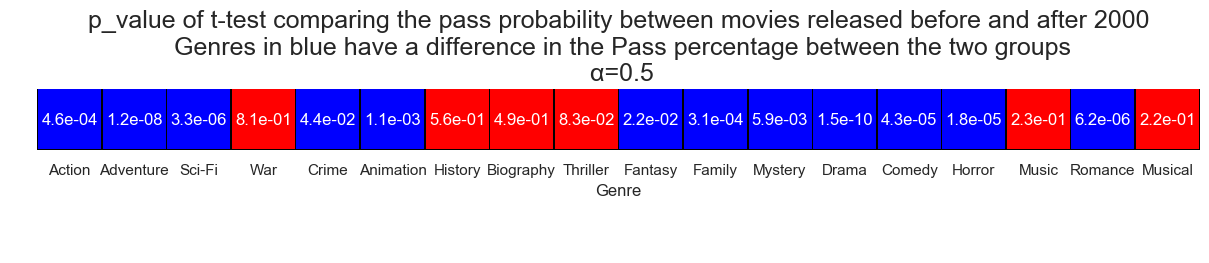

In [48]:
plt.figure(figsize=(15,0.8))
sns.set(font_scale=1)

heatmap=sns.heatmap(df_pvalues.iloc[:,[1]].T,cmap='bwr_r',annot=df_pvalues.iloc[:,[0]].T,fmt='.1e',cbar=False,linewidth=.4,
            linecolor='black')
plt.title('p_value of t-test comparing the pass probability between movies released before and after 2000'+\
          '\n Genres in blue have a difference in the Pass percentage between the two groups\n \u03B1=0.5',fontsize=18)
heatmap.set_yticklabels(heatmap.get_yticklabels(), color='white');


According to the tests, only the following genres did not see a statistically relevant change in the pass value over the two release date groups: War, History, Biography, Thriller, Music and Musical. These genres had both a small difference in the percentages, as well as a smaller number of samples.

### 4.1 Correcting P-Hacking

P-Hacking is an issue that can occur when performing many statistical tests on the data.
When a large number of tests are performed, some eventually may produce false positive results (where the test may conclude there is a statistical significance when there isn't). This could be a problem on the previous analysis, since 18 different tests were performed.

To illustrate this problem, a the xkcd comic is presented below. Where different colors of been are tested to see if they cause acne.

After testing 20 different bean colors, they found that green beans were associated to acne with a 95% interval of confidence. However, this is expected, as performing 20 tests with a totally random data, it is expected that one will be statisticaly relevant (0.05*20=1)

<img src="images/significance2.png" alt="Drawing" style="height: 1000px;"/>

To correct this, some methods exist that consider the multiple tests that were performed and modifies the signigicance level of the test.

**Bonferroni correction**

This methods aim is to decrease the Family wise error rate (FWER) - the probability of at least one false positive.

The Bonferroni correction follows the steps:

1. Suppose *m* tests were performed
2. The significance level adopted will be $\alpha_{new}=\alpha/m$
3. The test is statistically significant if the P-values are less than $\alpha_{new}$ significant

The Bonferroni is a very conservative approach (A family-wise alpha of 0.05, divided in this way by 1,000 to account for 1,000 significance tests, yields a very stringent per-hypothesis alpha of 0.00005). Another less conservative approach is the BH correction.

In this study, where the significance was considered as being 0.05 and 18 tests were performed, the new significance level according to this method would be 0.05/18=0.00277.

The genres that have had a significance change in percentage over the two groups are shown below.

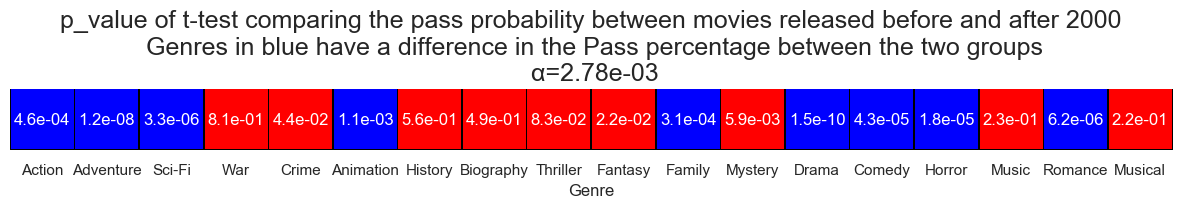

In [49]:
#Dividing the original relevance by the number of tests performed
df_pvalues['Statistically_relevant_bonferroni']=df_pvalues['p_value'].values<0.05/18

plt.figure(figsize=(15,0.8))
sns.set(font_scale=1)

heatmap=sns.heatmap(df_pvalues.iloc[:,[2]].T,cmap='bwr_r',annot=df_pvalues.iloc[:,[0]].T,fmt='.1e',cbar=False,linewidth=.4,
            linecolor='black')
plt.title('p_value of t-test comparing the pass probability between movies released before and after 2000'+\
          '\n Genres in blue have a difference in the Pass percentage between the two groups\n \u03B1={:.2e}'.format(0.05/18),
          fontsize=18)
heatmap.set_yticklabels([''], color='white');

plt.tight_layout()


By considering the BonFerroni method, genres such as Crime, Fantasy, Mystery are no longer considered to have a statistically significant difference between groups pre 2000 and post 2000.


**Benjamini Hochberg false discovery rate (FDR)**

This approach aims at reducing the rate at which claims of significance are false.
It is less stringent when compared to the Bonferroni correction, thus having a greater power, but at the cost of increased numbers of false positives.

This approach has the steps:

1. Suppose *m* tests were performed
2. Calculate the P-values and order them from smalles to largest: P(1),P(2),...,P(m)
3. The test is statistically significant if:
$P(i)<=\alpha*i/m$

In other words, if 10 tests are performed, the lowest p-value is compared to the alpha (significance) divided by 10, the second lowest p-value is compared to the significance divided by 10/2, the thir lowest p-value is compared to the significance divided by 10/3.

This criteria was applied to the same t-tests performed before and is shown in the figure below:

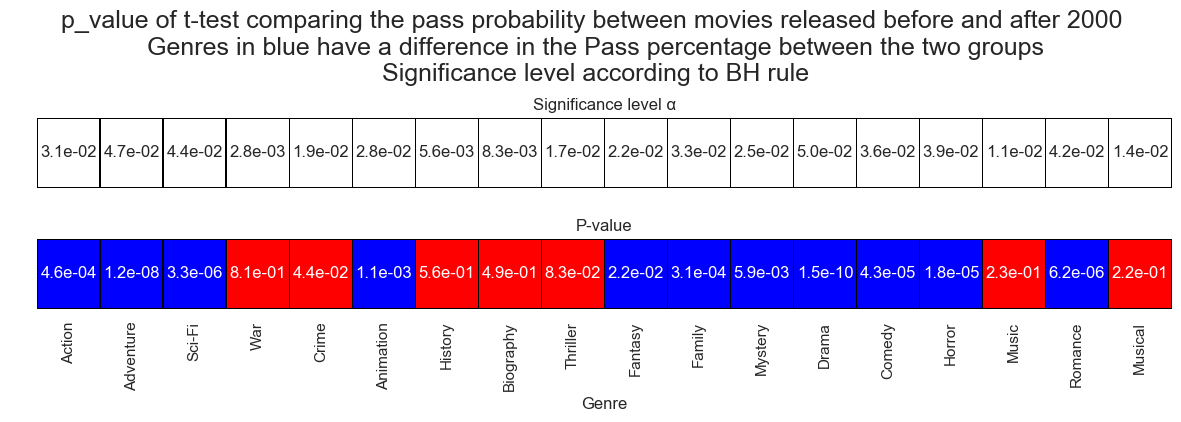

In [50]:
# Block to calculate new significances according to BH test
df_pvalues['rank']=df_pvalues['p_value'].rank(ascending=False)
df_pvalues['significance']=df_pvalues['rank']*0.05/18

df_pvalues['Statistically_relevant_BH']=df_pvalues.apply(lambda x: x['p_value']<x['significance'],axis=1)

fig,axs=plt.subplots(2,1,figsize=(12,3.5),sharex=True)


plt.setp([axs[0]], title='Significance level \u03B1')
plt.setp([axs[1]], title='P-value')

sns.set(font_scale=1)
plt.suptitle('p_value of t-test comparing the pass probability between movies released before and after 2000'+\
          '\n Genres in blue have a difference in the Pass percentage between the two groups\n Significance level according to BH rule'
             ,fontsize=18,y=1.2)

heatmap=sns.heatmap(df_pvalues.iloc[:,[4]].T,vmin=0,vmax=0,cmap='Greys',annot=df_pvalues.iloc[:,[4]].T,fmt='.1e',cbar=False,linewidth=.4,
            linecolor='black',ax=axs[0])

heatmap2=sns.heatmap(df_pvalues.iloc[:,[5]].T,cmap='bwr_r',annot=df_pvalues.iloc[:,[0]].T,fmt='.1e',cbar=False,linewidth=.4,
            linecolor='black',ax=axs[1])

heatmap.set_yticklabels(heatmap.get_yticklabels(), color='white');
axs[0].xaxis.label.set_visible(False)
heatmap2.set_yticklabels(heatmap.get_yticklabels(), color='white');

plt.tight_layout()


As observed in the values above, the BH criteria is less stringent when compared to the Bonferroni criteria: Fantasy and Mystery genres are considered to have had a significant change between pre and pos 2000 movies.

# 5. Movie rating analysis

From the first correlation plot, it was observed that there was a negative correlation between the rating of a movie and the Bechdel Pass score.

From this information, a direct explanation would be that movies that pass the Bechdel Test are normally less well received. Which would seem to be confirmed when looking at the percentage of movies that pass the Test for different rating groups

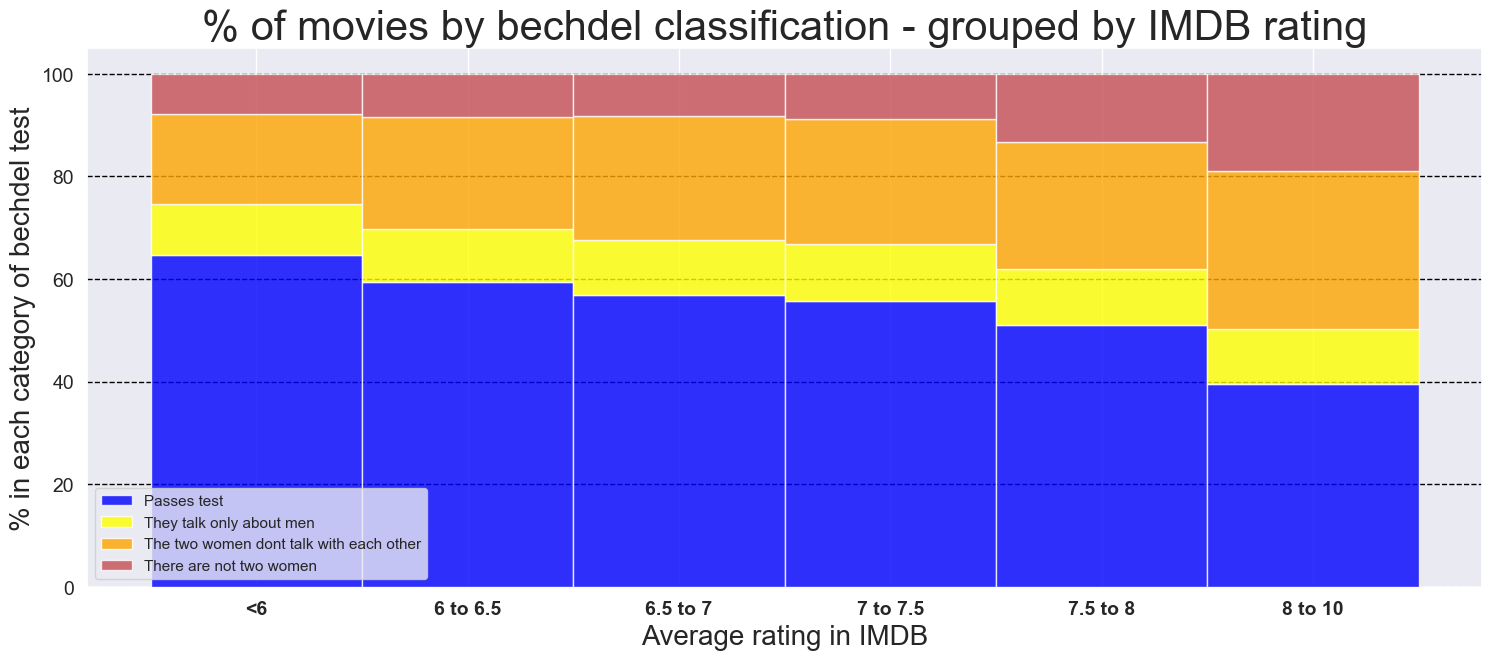

In [51]:
#plot_stacked(bechdel3,'rating_bins',
#            ['<6','6 to 6.5','6.5 to 7','7 to 7.5','7.5 to 8','8 to 10'],'Average rating in IMDB','Number of movies by bechdel classification - grouped by IMDB rating')
plot_stacked_100(bechdel3,'rating_bins',
            ['<6','6 to 6.5','6.5 to 7','7 to 7.5','7.5 to 8','8 to 10'],'Average rating in IMDB','% of movies by bechdel classification - grouped by IMDB rating')

However, it is important to study the interaction with other factors before establishing a cause-effect relation.

A new correlation plot between variables is shown below, this time considering other features, such as movie genre.


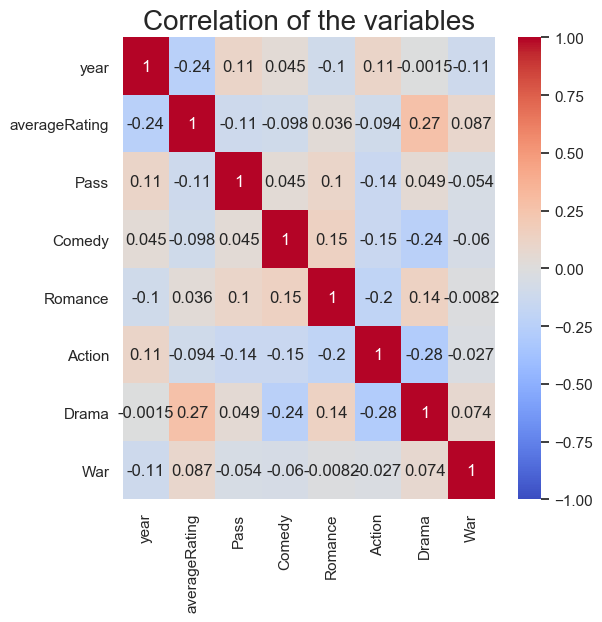

In [52]:
fig, ax = plt.subplots(figsize=(6,6))
correlation_matrix=bechdel3.drop(['numVotes','budget','revenue','News','no_info','Short','Adult','Sport','Music','Western','Sci-Fi','Mystery','Biography',
                                 'Family','Fantasy','History','Documentary','Crime','Horror','Musical','Thriller',
                                  'Animation','TMDB_vote_avg','director_number','producer_number','actor2_gender_M','actor2_gender_W',
                                 'actor3_gender_M','actor3_gender_W','actor4_gender_M','actor4_gender_W',
                                 'actor5_gender_M','actor5_gender_W','actor1_gender_M','director_gender_M','director_gender_W',
                                 'actor1_gender_W','runtimeMinutes','actor_number','number_female_actors','number_male_actors',
                                  'profit_over_budget','Film-Noir','Adventure'],axis=1)
ax=sns.heatmap(correlation_matrix.corr(),cmap='coolwarm',annot=True,vmin=-1)
plt.yticks(rotation=0) 
ax.set_title('Correlation of the variables', fontsize=20, fontdict={});


From this correlation plot:

1. The Genre of the movie is correlated with the average Rating: Dramas were better received when compared to other genres.
2. The release date has also a negative correlation to the movie rating, which means more recent movies have on average a smaller rating than older movies.
3. As was studied before, both genre and release date were very good indicators of whether a movie passes the bechdel test.

This leads to other explanations to why there is an inverse correlation between Bechdel Score and movie rating: 

- Movie genres which are less likely to pass the Bechdel Score also tend to receive higher ratings (such as War). So, instead of a cause-effect relation, the relation is purely limited to correlation.
- Older movies submitted to the bechdel.com site tend to have on average higher rating than newer movies. There are people rewatching old classics, people watching new forgettable movies, but there are not a lot of people watching older movies which were not well received. As was studied before, older movies tend to have a lower Bechdel scores, which would explain the negative correlation between Bechdel score and rating.

These two hypothesis are studied in the figures below. A continous t-test was applied to each category to see if there was a difference in rating between movies that pass and movies that fail the Bechdel test. The criteria used was the BH one.

In [53]:
#Similar to the section where the movie pass probability was calculated considering both release year group and genre,
#calculate average rating considering both the bechdel group and genre

bechdel3_only_2010s=bechdel3_only_2000s[bechdel3_only_2000s['year']>2010]

df_pass=bechdel3_only_2000s[bechdel3_only_2000s['Pass']==1]
df_fails=bechdel3_only_2000s[bechdel3_only_2000s['Pass']==0]


d=[]
for genre in Genres:
    total = df_pass[genre].sum()
    avg_rating=df_pass[df_pass[genre]==1].mean()['averageRating']

    d.append({'Genre':genre,
             'number of movies':total,
             'avg_rating':avg_rating})

df_pass2 = pd.DataFrame(d).sort_values(by=['avg_rating'])

d=[]
for genre in Genres:
    total = df_fails[genre].sum()
    avg_rating=df_fails[df_fails[genre]==1].mean()['averageRating']

    d.append({'Genre':genre,
             'number of movies':total,
             'avg_rating':avg_rating})

df_fails2 = pd.DataFrame(d).sort_values(by=['avg_rating'])

Genres_1=list(df_pass2[df_pass2['number of movies']>50]['Genre'])
Genres_2=list(df_fails2[df_fails2['number of movies']>50]['Genre'])

Genre_order=[]
for genre in Genres_1:
    if genre in Genres_2:
        Genre_order.append(genre)

rating_movies={'Genre':[],'pass':[],'fail':[]}
for genre in Genre_order:
    rating_movies['Genre'].append(genre)
    rating_movies['pass'].append(df_pass[genre].sum())
    rating_movies['fail'].append(df_fails[genre].sum())
df_order=pd.DataFrame.from_dict(rating_movies)

df_order=df_order.set_index('Genre')
arr=df_order.values
vmin,vmax=arr.min(),arr.max()

In [54]:
# t-test for continous data
def p_value_genre_pass(df_pass,df_fail,genre,column):
    pass_filtered=df_pass[df_pass[genre]==1][column]
    fail_filtered=df_fail[df_fail[genre]==1][column]
    
    mean_pass=pass_filtered.mean()
    mean_fail=fail_filtered.mean()

    std_pass=pass_filtered.std()
    std_fail=fail_filtered.std()
    
    total_pass=pass_filtered.count()
    total_fail=fail_filtered.count()

    statistic,pvalue=ttest_ind_from_stats(mean1=mean_pass, std1=std_pass, nobs1=total_pass,
                         mean2=mean_fail, std2=std_fail, nobs2=total_fail)
    return pvalue

#Calculating p-value for each genre test
p_values={'Genre':[],'p_value':[]}
for genre in Genre_order:
    p_values['Genre'].append(genre)
    p_values['p_value'].append(p_value_genre_pass(df_pass,df_fails,genre,'averageRating'))
df_pvalues=pd.DataFrame.from_dict(p_values)
df_pvalues=df_pvalues.set_index('Genre')

df_pvalues['rank']=df_pvalues['p_value'].rank(ascending=False)
df_pvalues['significance']=df_pvalues['rank']*0.05/18

df_pvalues['Statistically_relevant_BH']=df_pvalues.apply(lambda x: x['p_value']<x['significance'],axis=1)

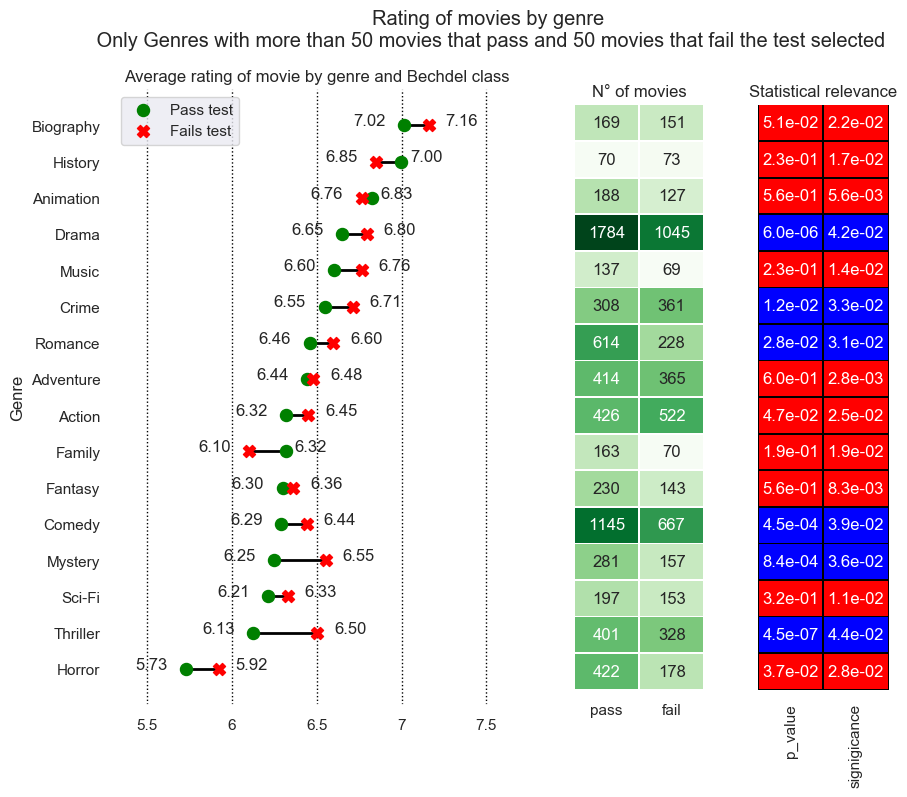

In [55]:
fig=plt.figure(figsize=(10,8))
gspec= fig.add_gridspec(80,17)
left_ax= plt.subplot(gspec[:,:9])
center_ax=plt.subplot(gspec[2:78,10:13])
right_ax=plt.subplot(gspec[2:78,14:17])

axs=[left_ax,center_ax,right_ax]
# Vertical Lines
for x_value in [5.5,6,6.5,7,7.5]:
    axs[0].vlines(x=x_value, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

df_fails3=df_fails2[df_fails2['Genre'].isin(Genre_order)]
df_pass3=df_pass2[df_pass2['Genre'].isin(Genre_order)]

# Points

axs[0].scatter(y=df_pass3['Genre'], x=df_pass3['avg_rating'], s=75, color='green', alpha=1,zorder=2,label='Pass test',
               marker='o')
axs[0].scatter(y=df_fails3['Genre'], x=df_fails3['avg_rating'], s=75, color='red', alpha=1,zorder=2,label='Fails test',
               marker='X')
axs[0].legend(loc=2)

df_unified=df_fails3.merge(df_pass3,on='Genre',how='outer')
#Line Segments
for i, p1, p2 in zip(df_unified['Genre'], df_unified['avg_rating_x'], df_unified['avg_rating_y']):
    newline([p1, i], [p2, i],axs[0])
axs[0].set_facecolor('#f7f7f7')


plt.suptitle("Rating of movies by genre"+\
"\n Only Genres with more than 50 movies that pass and 50 movies that fail the test selected", fontdict={'size':22})

axs[0].set(xlim=(5.3,7.7), ylim=(-1, 16), ylabel='Genre')
axs[0].set_xticks([5.5,6,6.5,7,7.5])
axs[0].set_xticklabels([5.5,6,6.5,7,7.5])

for i, txt in enumerate(df_unified['avg_rating_x']):
    axs[0].annotate('{:.2f}'.format(txt), (df_unified.iloc[i]['avg_rating_x']+0.1-
                                           (df_unified.iloc[i]['avg_rating_x']<df_unified.iloc[i]['avg_rating_y'])*0.4,
                                           df_unified.iloc[i]['Genre']))
for i, txt in enumerate(df_unified['avg_rating_y']):
    axs[0].annotate('{:.2f}'.format(txt), (df_unified.iloc[i]['avg_rating_y']-0.3+
                                           (df_unified.iloc[i]['avg_rating_x']<df_unified.iloc[i]['avg_rating_y'])*0.35,
                                           df_unified.iloc[i]['Genre']))
axs[0].set_facecolor("white")
sns.heatmap(df_order.iloc[::-1], annot=True, fmt="d", norm=LogNorm(vmin=vmin, vmax=vmax), cmap='Greens',ax=axs[1],
            linewidths=.5,linecolor='white',cbar=False)
axs[0].set_title('Average rating of movie by genre and Bechdel class')

axs[1].set_title(u'N\N{DEGREE SIGN} of movies')
axs[2].set_title('Statistical relevance')

inner_grid=gspec[2:78,14:17].subgridspec(1,2, wspace=0.0, hspace=0.0)
subax1 = fig.add_subplot(inner_grid[0])
subax2 = fig.add_subplot(inner_grid[1])


sns.heatmap(df_pvalues.iloc[:,[3]][::-1],annot=df_pvalues.iloc[:,[0]][::-1],vmin=0,vmax=1, 
            fmt=".1e", cmap='bwr_r',ax=subax1,xticklabels=['p_value'],
            linewidths=.5,linecolor='black',cbar=False)
sns.heatmap(df_pvalues.iloc[:,[3]][::-1],annot=df_pvalues.iloc[:,[2]][::-1],vmin=0,vmax=1, 
            fmt=".1e", cmap='bwr_r',ax=subax2,xticklabels=['signigicance'],
            linewidths=.5,linecolor='black',cbar=False)

for ax in [axs[1],axs[2],subax1,subax2]:
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelbottom=False)
    ax.tick_params(
        axis='both',          
        which='both',      
        left=False,      
        right=False,      
        bottom=False,
        top=False)
    labels = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_ylabel('',color='white')
    empty_string_labels = ['']*len(labels)
    ax.set_yticklabels(empty_string_labels)
axs[2].tick_params(axis='both',labelbottom=False)
for ax in [subax1,subax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

plt.tight_layout()
plt.show()

In [56]:
#Similar to the section where the movie pass probability was calculated considering both release year group and genre,
#calculate average rating considering both the bechdel group and release decade group

df_pass=bechdel3[bechdel3['Pass']==1]
df_fails=bechdel3[bechdel3['Pass']==0]

d=[]
for decade in pd.unique(bechdel3['decade_bins']):
    total = len(df_pass[df_pass['decade_bins']==decade])
    avg_rating=df_pass[df_pass['decade_bins']==decade].mean()['averageRating']

    d.append({'decade':decade,
             'number of movies':total,
             'avg_rating':avg_rating})

df_pass2 = pd.DataFrame(d)

d=[]
for decade in pd.unique(bechdel3['decade_bins']):
    total = len(df_fails[df_fails['decade_bins']==decade])
    avg_rating=df_fails[df_fails['decade_bins']==decade].mean()['averageRating']

    d.append({'decade':decade,
             'number of movies':total,
             'avg_rating':avg_rating})

df_fails2 = pd.DataFrame(d)

decade_order=pd.unique(bechdel3['decade_bins'])

rating_movies={'decade':[],'pass':[],'fail':[]}
for decade in decade_order:
    rating_movies['decade'].append(decade)
    rating_movies['pass'].append(len(df_pass[df_pass['decade_bins']==decade]))
    rating_movies['fail'].append(len(df_fails[df_fails['decade_bins']==decade]))
df_order=pd.DataFrame.from_dict(rating_movies)

df_order=df_order.set_index('decade')
arr=df_order.values
vmin,vmax=arr.min(),arr.max()


def p_value_decade_pass(df_pass,df_fail,decade,column):
    pass_filtered=df_pass[df_pass['decade_bins']==decade][column]
    fail_filtered=df_fail[df_fail['decade_bins']==decade][column]

    mean_pass=pass_filtered.mean()
    mean_fail=fail_filtered.mean()
    std_pass=pass_filtered.std()
    std_fail=fail_filtered.std()
    
    total_pass=pass_filtered.count()
    total_fail=fail_filtered.count()

    statistic,pvalue=ttest_ind_from_stats(mean1=mean_pass, std1=std_pass, nobs1=total_pass,
                         mean2=mean_fail, std2=std_fail, nobs2=total_fail)
    return pvalue

p_values={'decade':[],'p_value':[]}
for decade in decade_order:
    p_values['decade'].append(genre)
    p_values['p_value'].append(p_value_decade_pass(df_pass,df_fails,decade,'averageRating'))
df_pvalues=pd.DataFrame.from_dict(p_values)

df_pvalues=df_pvalues.set_index('decade')

df_pvalues['rank']=df_pvalues['p_value'].rank(ascending=False)
df_pvalues['significance']=df_pvalues['rank']*0.05/18

df_pvalues['Statistically_relevant_BH']=df_pvalues.apply(lambda x: x['p_value']<x['significance'],axis=1)

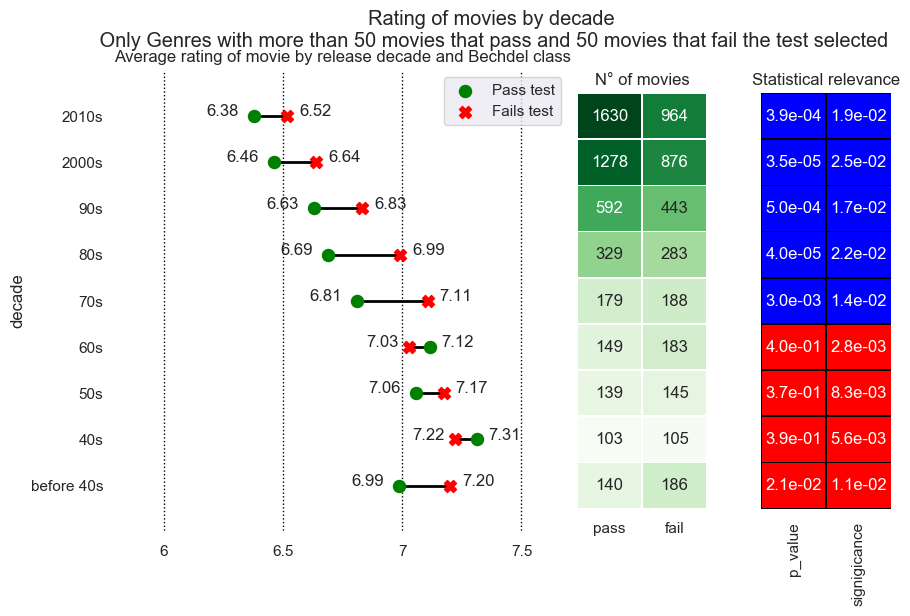

In [57]:
fig=plt.figure(figsize=(10,6))
gspec= fig.add_gridspec(80,17)
left_ax= plt.subplot(gspec[:,:10])
center_ax=plt.subplot(gspec[4:76,10:13])
right_ax=plt.subplot(gspec[4:76,14:17])
axs=[left_ax,center_ax,right_ax]

# Vertical Lines
axs[0].vlines(x=6, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
axs[0].vlines(x=6.50, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
axs[0].vlines(x=7, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
axs[0].vlines(x=7.5, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')


df_fails3=df_fails2
df_pass3=df_pass2
# Points

axs[0].scatter(y=df_pass3['decade'], x=df_pass3['avg_rating'], s=75, color='green', alpha=1,zorder=2,label='Pass test',
               marker='o')
axs[0].scatter(y=df_fails3['decade'], x=df_fails3['avg_rating'], s=75, color='red', alpha=1,zorder=2,label='Fails test',
               marker='X')
axs[0].legend(loc=1)

df_unified=df_fails3.merge(df_pass3,on='decade',how='outer')
#Line Segments
for i, p1, p2 in zip(df_unified['decade'], df_unified['avg_rating_x'], df_unified['avg_rating_y']):
    newline([p1, i], [p2, i],axs[0])
axs[0].set_facecolor('#f7f7f7')
plt.suptitle("Rating of movies by decade"+\
"\n Only Genres with more than 50 movies that pass and 50 movies that fail the test selected", fontdict={'size':22})

axs[0].set_title('Average rating of movie by release decade and Bechdel class')

axs[0].set(xlim=(5.8,7.7), ylim=(-1, 9), ylabel='decade')
axs[0].set_xticks([6,6.5,7,7.5])
axs[0].set_xticklabels([6,6.5,7,7.5])

for i, txt in enumerate(df_unified['avg_rating_x']):
    axs[0].annotate('{:.2f}'.format(txt), (df_unified.iloc[i]['avg_rating_x']+0.05-
                                           (df_unified.iloc[i]['avg_rating_x']<df_unified.iloc[i]['avg_rating_y'])*0.23,
                                           df_unified.iloc[i]['decade']))
for i, txt in enumerate(df_unified['avg_rating_y']):
    axs[0].annotate('{:.2f}'.format(txt), (df_unified.iloc[i]['avg_rating_y']-0.2+
                                           (df_unified.iloc[i]['avg_rating_x']<df_unified.iloc[i]['avg_rating_y'])*0.25,
                                           df_unified.iloc[i]['decade']))
axs[0].set_facecolor("white")

sns.heatmap(df_order.iloc[::-1], annot=True, fmt="d", norm=LogNorm(vmin=vmin, vmax=vmax), cmap='Greens',ax=axs[1],
            linewidths=.5,linecolor='white',cbar=False)
axs[1].set_title(u'N\N{DEGREE SIGN} of movies')
axs[2].set_title('Statistical relevance')

inner_grid=gspec[4:76,14:17].subgridspec(1,2, wspace=0.0, hspace=0.0)
subax1 = fig.add_subplot(inner_grid[0])
subax2 = fig.add_subplot(inner_grid[1])


sns.heatmap(df_pvalues.iloc[:,[3]][::-1],annot=df_pvalues.iloc[:,[0]][::-1],vmin=0,vmax=1, 
            fmt=".1e", cmap='bwr_r',ax=subax1,xticklabels=['p_value'],
            linewidths=.5,linecolor='black',cbar=False)
sns.heatmap(df_pvalues.iloc[:,[3]][::-1],annot=df_pvalues.iloc[:,[2]][::-1],vmin=0,vmax=1, 
            fmt=".1e", cmap='bwr_r',ax=subax2,xticklabels=['signigicance'],
            linewidths=.5,linecolor='black',cbar=False)

for ax in [axs[1],axs[2],subax1,subax2]:
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelbottom=False)
    ax.tick_params(
        axis='both',          
        which='both',      
        left=False,      
        right=False,      
        bottom=False,
        top=False)
    labels = [item.get_text() for item in ax.get_yticklabels()]
    ax.set_ylabel('',color='white')
    empty_string_labels = ['']*len(labels)
    ax.set_yticklabels(empty_string_labels)
axs[2].tick_params(axis='both',labelbottom=False)
for ax in [subax1,subax2]:
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

plt.tight_layout()
plt.ylabel('',color='white')
plt.show()



From the first graph it is possible to see that the majority of the genres is normally better received when the movie does not pass the Bechdel test, with the exception of the Family, History and Animation genres. However, it is only possible to conclude there is a significant difference in ratings for the genres Drama, Crime, Romance, Comedy, Mystery and Thriler.

From the second graph, there is a statistically relevant difference between movies that pass and movies that fail the test after the 70s. These movies normally tend to be better evaluated when they don't pass the Bechdel test.

From these analysis, it may be interesting to consider the average rating in the classification models.

# 6. Actor and director gender analysis

In [58]:
def calculate_pass_probability(dataset,column):
    pass_filtered= dataset[dataset[column]==1]['Pass']
    return pass_filtered.sum()/pass_filtered.count()


# Calculate the pass probability after filtering the dataset for different criteria
columns=['actor1_gender_W','actor2_gender_W','actor3_gender_W','actor4_gender_W','actor5_gender_W','director_gender_W',
        'actor1_gender_M','actor2_gender_M','actor3_gender_M','actor4_gender_M','actor5_gender_M','director_gender_M']
col_probabilities={}
total_samples={}
for col in columns:
    col_probabilities[col]=calculate_pass_probability(bechdel3,col)
    total_samples[col]=bechdel3[bechdel3[col]==1]['Pass'].count()
col_probabilities['All']=bechdel3['Pass'].sum()/bechdel3['Pass'].count()
total_samples['All']=bechdel3['Pass'].count()
col_probabilities=dict(sorted(col_probabilities.items(), key=lambda item: item[1]))
total_samples_order=[total_samples[x] for x in col_probabilities.keys()]
total_samples=dict(zip(col_probabilities.keys(),total_samples_order))
col_prob_df=pd.DataFrame(zip(col_probabilities.keys(),col_probabilities.values()),columns=['Column','Probability'])
total_samples_df=pd.DataFrame(zip(total_samples.keys(),total_samples.values()),columns=['Column','Count'])

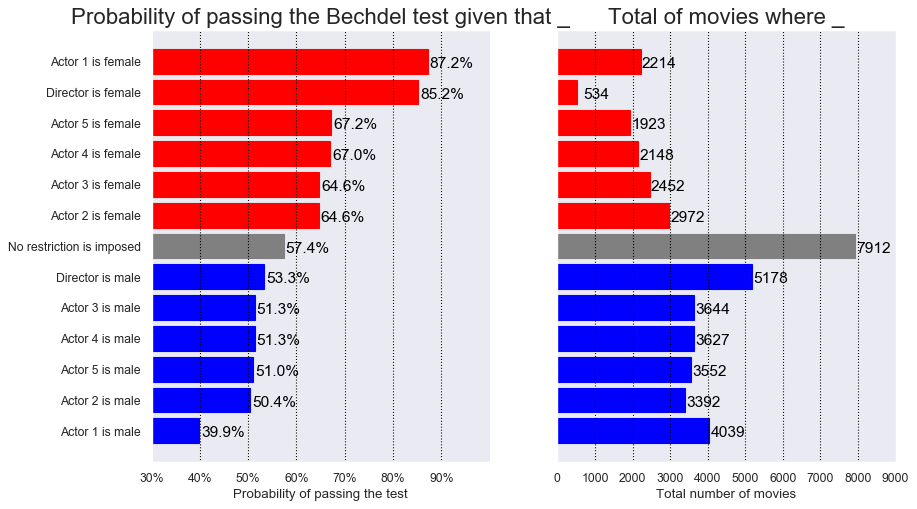

In [59]:
fig, ax = plt.subplots(1,2,figsize=(12,7),  dpi= 80,sharey=True)
sns.barplot(x='Probability',y='Column',data=col_prob_df,orient='h',ax=ax[0])
i=0
for bar in ax[0].patches:
    if i < 6:
        bar.set_color('blue')    
    elif i==6:
        bar.set_color('grey')
    else:
        bar.set_color('red')

    i+=1
ax[0].set(xlim=(.3,1), ylim=(-1, 13), xlabel='Probability of passing the test',ylabel='')
ax[0].set_xticks([.3,.4,.5,.6,.7,.8,.9])
ax[0].set_xticklabels(['30%', '40%','50%','60%','70%','80%','90%'])
# Vertical Lines
for percentage in [.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
    ax[0].vlines(x=percentage, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

ax[0].set_title('Probability of passing the Bechdel test given that _', fontsize=20)

label_equivalence={'actor1_gender_M':'Actor 1 is male', 'actor2_gender_M':'Actor 2 is male', 
                   'actor5_gender_M':'Actor 5 is male', 'actor4_gender_M':'Actor 4 is male', 
                   'actor3_gender_M':'Actor 3 is male', 'director_gender_M':'Director is male',
                   'All':'No restriction is imposed', 'actor2_gender_W':'Actor 2 is female', 'actor3_gender_W':'Actor 3 is female',
                   'actor4_gender_W':'Actor 4 is female', 'actor5_gender_W':'Actor 5 is female',
                   'director_gender_W':'Director is female', 'actor1_gender_W':'Actor 1 is female'}
order=col_probabilities.keys()
labels=[label_equivalence[x] for x in order]
ax[0].set_yticklabels(labels)

for rect in ax[0].patches:
    y_value=rect.get_y()+rect.get_height()/2
    x_value=rect.get_width()
    ax[0].annotate('{:.1f}%'.format(x_value*100),(x_value+0.05,y_value-0.2),ha='center',color='black',fontsize=14)
    
sns.barplot(x='Count',y='Column',data=total_samples_df,orient='h',ax=ax[1])
i=0
for bar in ax[1].patches:
    if i < 6:
        bar.set_color('blue')    
    elif i==6:
        bar.set_color('grey')
    else:
        bar.set_color('red')

    i+=1
ax[1].set( ylim=(-1, 13), xlabel='Total number of movies',ylabel='',xlim=(0,9000))
order=total_samples.keys()
labels=[label_equivalence[x] for x in order]
ax[1].set_yticklabels(labels)

plt.title('Total of movies where _', fontsize=20)
for number in [1000,2000,3000,4000,5000,6000,7000,8000]:
    ax[1].vlines(x=number, ymin=-2, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
for rect in ax[1].patches:
    y_value=rect.get_y()+rect.get_height()/2
    x_value=rect.get_width()
    ax[1].annotate('{:.0f}'.format(x_value),(x_value+500,y_value-0.2),ha='center',color='black',fontsize=14)

From the two above graphs it is possible to see:

1. When the director was a woman, the probability of passing the test was the highest. On the other hand, when the director was a man, the probability was very similar to the overall probability. This is because the database is dominated by movies directed by men. (Obs: The reason why the sum of female (534) and male directors (5178) was different than the total number of movies (7912) was because some movies didn't have the gender specified in the dataset.
2. The gender of the first actor mentioned in IMDB was one of the highest determinants of wheter or not the movie passed the bechdel test. The 4 other main actors were also important, but not as much as the first actor.

In the graph below, it is shown the effect that having more actors of a certain gender has on the Pass probability.

As expected, the more women there are, the higher the probability of passing the test. In fact, all of the 61 movies that had the top 5 actors of the movie being female passed the test.

In opposite, the more men present in the top 5 actors shown by IMDB, the less likely the movie would pass the test

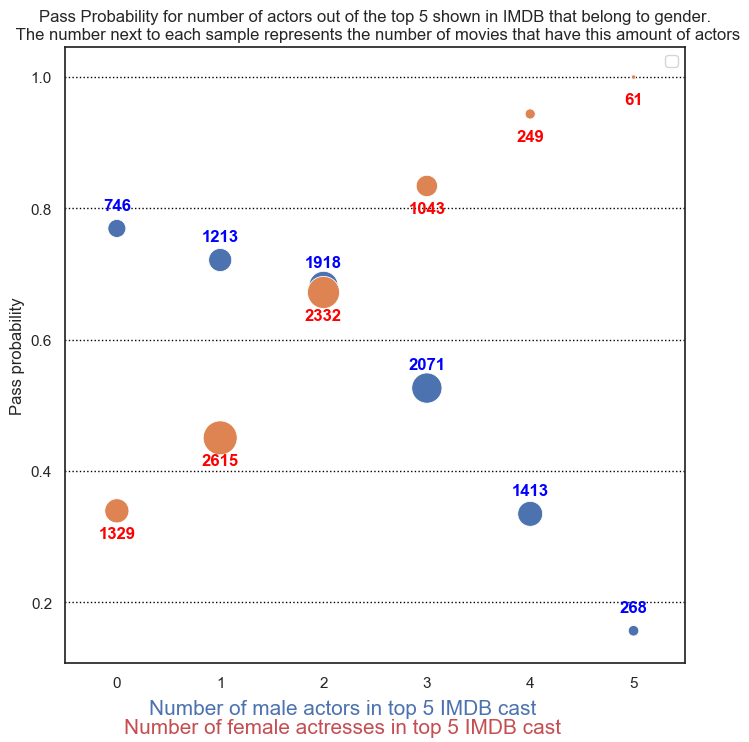

In [60]:
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker, VPacker

grouped_f=bechdel3.groupby(['number_female_actors']).agg(Total_movies=('Pass','count'),Pass_Probability=('Pass','mean'))
grouped_m=bechdel3.groupby(['number_male_actors']).agg(Total_movies=('Pass','count'),Pass_Probability=('Pass','mean'))
grouped_f['gender']='Female'
grouped_m['gender']='Male'
grouped=pd.concat([grouped_m,grouped_f])
grouped['number_actors']=grouped.index
sns.set_theme(style="white");

plt.figure(figsize=(8,8));

ax=sns.scatterplot(data=grouped,x='number_actors',y='Pass_Probability',hue='gender',size='Total_movies',sizes=(10, 600))
plt.title('Pass Probability for number of actors out of the top 5 shown in IMDB that belong to gender.\n The number \
next to each sample represents the number of movies that have this amount of actors');
handles, labels = ax.get_legend_handles_labels()
labels=[labels[1],labels[2]]
handles=[handles[1],handles[2]]
plt.legend([], []);
ax.hlines(y=.20, xmin=-2, xmax=6, color='black', alpha=1, linewidth=1, linestyles='dotted',zorder=0)
ax.hlines(y=.40, xmin=-2, xmax=6, color='black', alpha=1, linewidth=1, linestyles='dotted',zorder=0)
ax.hlines(y=.60, xmin=-2, xmax=6, color='black', alpha=1, linewidth=1, linestyles='dotted',zorder=0)
ax.hlines(y=.80, xmin=-2, xmax=6, color='black', alpha=1, linewidth=1, linestyles='dotted',zorder=0)
ax.hlines(y=1, xmin=-2, xmax=6, color='black', alpha=1, linewidth=1, linestyles='dotted',zorder=0)
plt.xlim([-.5,5.5])

for line in range(0,grouped_f.shape[0]):
         ax.text(grouped_f.index[line], grouped_f['Pass_Probability'][line]-0.035, 
                 grouped_f['Total_movies'][line], horizontalalignment='left', 
                 size='medium', color='red', weight='semibold',va='center',ha='center',fontsize=12)
for line in range(0,grouped_m.shape[0]):
         ax.text(grouped_m.index[line], grouped_m['Pass_Probability'][line]+0.035, 
                 grouped_m['Total_movies'][line], horizontalalignment='left', 
                 size='medium', color='blue', weight='semibold',va='center',ha='center',fontsize=12)
plt.xlabel('')
xbox1 = TextArea("Number of male actors in top 5 IMDB cast", textprops=dict(color="b", size=15,rotation=0,ha='left',va='center'))
xbox3 = TextArea("Number of female actresses in top 5 IMDB cast", textprops=dict(color="r", size=15,rotation=0,ha='left',va='center'))

xbox = VPacker(children=[xbox1, xbox3],align="center", pad=0, sep=0)

anchored_xbox = AnchoredOffsetbox(loc=1, child=xbox, pad=0., frameon=False, bbox_to_anchor=(.8, -0.05), 
                                  bbox_transform=ax.transAxes, borderpad=0.)
ax.add_artist(anchored_xbox);
plt.ylabel('Pass probability');

# PART 2 - CLASSIFICATION PROBLEM

# 7. Feature selection

Before building the classification models, all non-numeric features were removed from the dataset.

The features *budget, revenue and profit_over_budget* were also discarded, as they did not have a big impact on the test outcome and there were plenty of missing values on these columns.

In [61]:
bechdel4=bechdel3.drop(['tconst','title','clean_test','original_language','binary','genres','decade_bins'
                        ,'TMDB_rating_bins','profit_over_budget','budget_binned','runtimeMinutes_binned','rating_bins'],axis=1)
bechdel5=bechdel4.replace({ -1:np.nan})

bechdel5_without_extra_info=bechdel5.drop(['TMDB_vote_avg','budget','revenue','titleType','profit_over_budget_binned','titleType'],axis=1).dropna()
bechdel5_with_budget_revenue=bechdel5.drop(['titleType'],axis=1).dropna()

md('All movies of the original **{}** which had missing values were not considered. After all the processing,'.format(len(bechdel3))+\
   ' **{}** movies remained in the dataset'.format(len(bechdel5_without_extra_info)))

All movies of the original **7912** which had missing values were not considered. After all the processing, **7623** movies remained in the dataset

# 8. Classification with Decision Trees

Before performing any feature selection and scaling, a decision tree model is implemented to explore the useful variables present in the dataset.

A decision tree is a graph that uses a branching method to illustrate every possible outcome of a decision. 
Each node represents a "test/question" on a feature (Ex: is the release date after 1998?), each branch represents the answer of the question (True/False) and each leaf node represents a class label (Given the answer of the question, does the movie pass the Bechdel test?).

A decision tree is very useful since there is no need to normalize or scale the data, it works well in datasets with a mixture of feature types (continous, binary, category) and it is easy to interpret.

The figure below shows a decision tree obtained after the parameter optimization.

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import RFE
from random import sample
from collections import Counter
import time
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score,recall_score
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(4, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [63]:
# Splitting data in train and test dataset

X = bechdel5_without_extra_info.loc[:, bechdel5_without_extra_info.columns != 'Pass']
y = bechdel5_without_extra_info.loc[:, bechdel5_without_extra_info.columns == 'Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

In [64]:
# Using the model to predict
model = DecisionTreeClassifier()
param_search = {'max_depth' : np.arange(10)[1:],'criterion':['gini','entropy'],'min_samples_split':[200,500,1000],
                'min_samples_leaf':[100,150,200],'min_impurity_decrease':[0,0.0001]}
gsearch_dt = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='accuracy')
gsearch_dt.fit(X_train, y_train['Pass'])

best_params=gsearch_dt.best_estimator_
y_pred = gsearch_dt.predict(X_test)


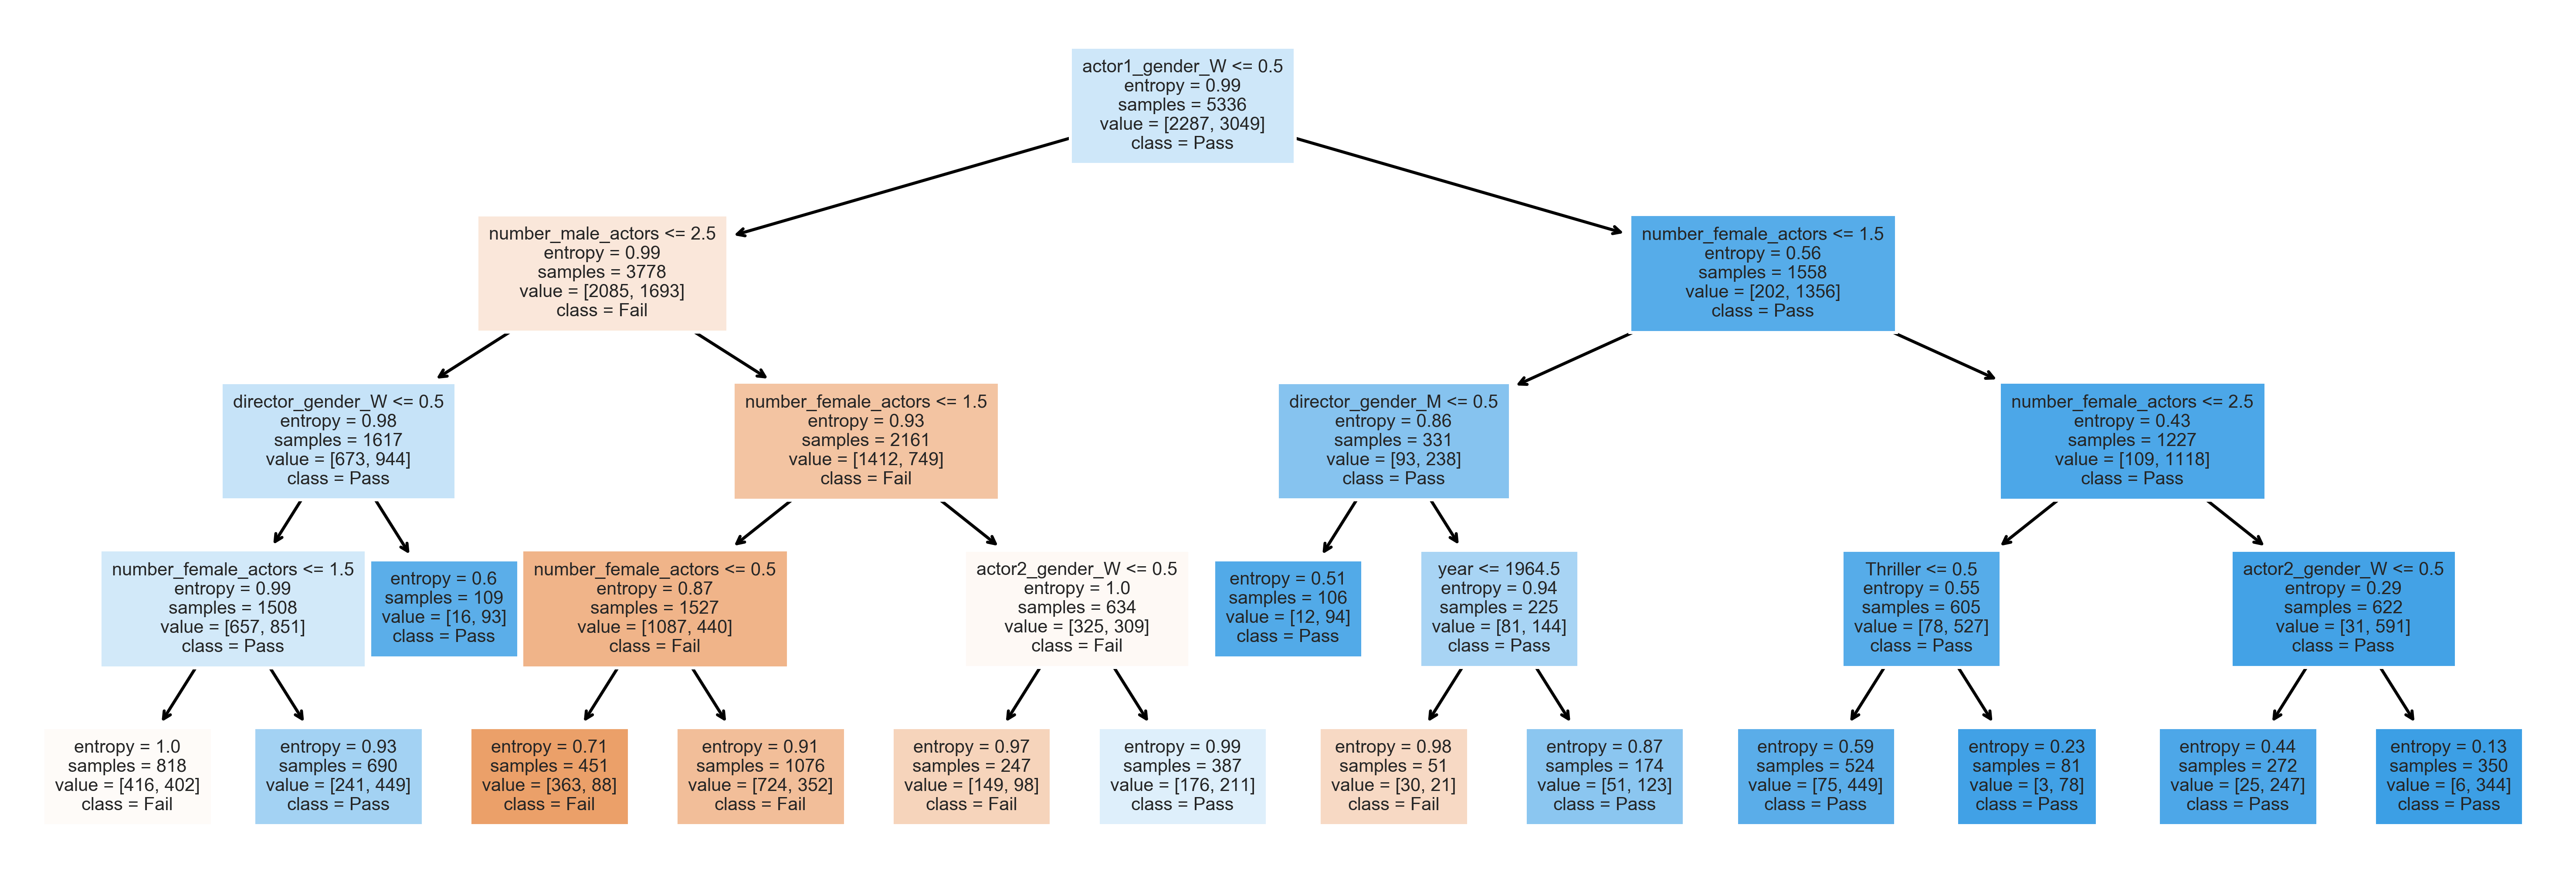

In [65]:
model=DecisionTreeClassifier(max_depth=4,criterion='entropy',min_impurity_decrease=0,min_samples_leaf=50,min_samples_split=200)
model.fit(X_train,y_train['Pass'])

fig,axes=plt.subplots(1,1,figsize=(15,5),dpi=500)
out=tree.plot_tree(model,precision=2,feature_names=X_train.columns,class_names=['Fail','Pass'],filled=True,fontsize=6)
for o in out:
    arrow=o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')

Leafs in blue are leafs where the majority of the movies pass the test. So, if a movie would fall in these leafs, it would be classified as passing the test.

As an example, a movie where the actor 1 is female, the number of female actresses out of the top 5 is between 1.5 and 2.5 (In other words 2) and belongs to the genre Thriller is classified as passing the test, since out of the 81 movies in the training data that respected these conditions, 78 passed the test.

The tree was found by using GridSearchCV and finding the best parameters that maximized the accuracy of the tree. The following values were tested (a total of 10x2x3x3x2=360 models):
* max_depth= [1,2,3,4,5,6,7,8,9,10]
* min_impurity_decrease= [0, 0.0001]
* min_samples_leaf= [100, 150, 200]
* min_samples_split= [200, 500, 1000]
* criterion= [gini, entropy]

In [66]:
md('The optimal tree had the following hyperparameters: <br>- max_depth= {}'.format(best_params.max_depth)+\
  '<br>- min_impurity_decrease= {}'.format(best_params.min_impurity_decrease)+\
  '<br>- min_samples_split= {}'.format(best_params.min_samples_split)+\
  '<br>- min_samples_leaf= {}'.format(best_params.min_samples_leaf)+\
  '<br>- criterion= {}'.format(best_params.criterion)+\
  '<br> This model had an accuracy on the test set equal to **{:.1f}%**'.format(100*accuracy_score(y_pred, y_test)))

The optimal tree had the following hyperparameters: <br>- max_depth= 4<br>- min_impurity_decrease= 0<br>- min_samples_split= 200<br>- min_samples_leaf= 200<br>- criterion= gini<br> This model had an accuracy on the test set equal to **72.2%**

The confusion matrix for this model is shown below

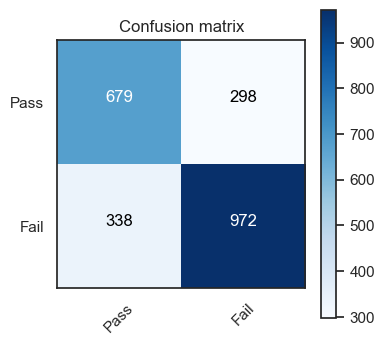

In [67]:
cm = confusion_matrix(np.array(y_test), y_pred)
plot_confusion_matrix(cm,['Pass','Fail'],normalize=False)

And the ROC is also shown below:

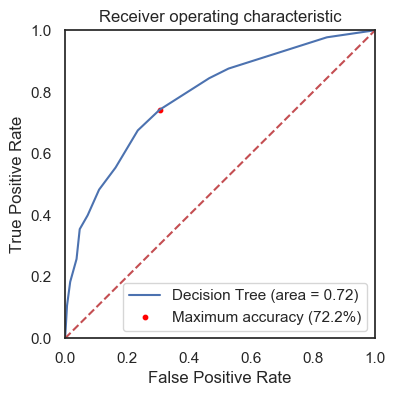

In [68]:
TP, FP, TN, FN=perf_measure(list(y_test['Pass']),list([int(y) for y in y_pred]))
FPR=FP/(TN+FP)
TPR=TP/(FN+TP)
dt_roc_auc = roc_auc_score(y_test, gsearch_dt.predict(X_test))
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, gsearch_dt.predict_proba(X_test)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.scatter(FPR,TPR,color='red',s=10,label='Maximum accuracy ({:.1f}%)'.format(100*accuracy_score(y_pred, y_test)))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

## 8.1 Measuring feature importance in a decision tree
As seen in the tree, most decisions were due to gender related features. To measure the importance of each feature, 10k different decision trees were performed, where each tree contains:

1. A subset of the features
2. A subset of the samples

From each tree the feature importance is extracted (How much each feature used in the tree was useful to separate the samples into two different groups. Features used at the root of the tree are normally more important). The importance of each feature in each tree is summed and the most important features have the highest scores.

Naturally, in this method, if two features have a high absolute correlation (such as actor2_gender_M and actor2_gender_W), they are given similar importance. The feature importance of each variable is shown below.

In [69]:
X=bechdel5_without_extra_info.loc[:, bechdel5_without_extra_info.columns != 'Pass']
columns_set=set(X.columns)

simulations=10*1000
total_feat_imp=dict(zip(columns_set,np.zeros(len(columns_set))))
total_feat_appearances=dict(zip(columns_set,np.zeros(len(columns_set))))
t0=time.time()
for i in range(simulations):
    i+=1
    data=bechdel5_without_extra_info.sample(2000,replace=True)
    X=data.loc[:, bechdel5_without_extra_info.columns != 'Pass']
    y=data.loc[:, bechdel5_without_extra_info.columns == 'Pass']
    sample_columns=sample(columns_set,8)
    X=X[sample_columns]
    decision_tree=DecisionTreeClassifier(max_depth=3)
    decision_tree.fit(X,y)
    feat_imp_iter=dict(zip(sample_columns,decision_tree.feature_importances_))
    feat_count_iter=dict(zip(sample_columns,decision_tree.feature_importances_>0))
    total_feat_imp=Counter(total_feat_imp)+Counter(feat_imp_iter)
    total_feat_appearances=Counter(total_feat_appearances)+Counter(feat_count_iter)

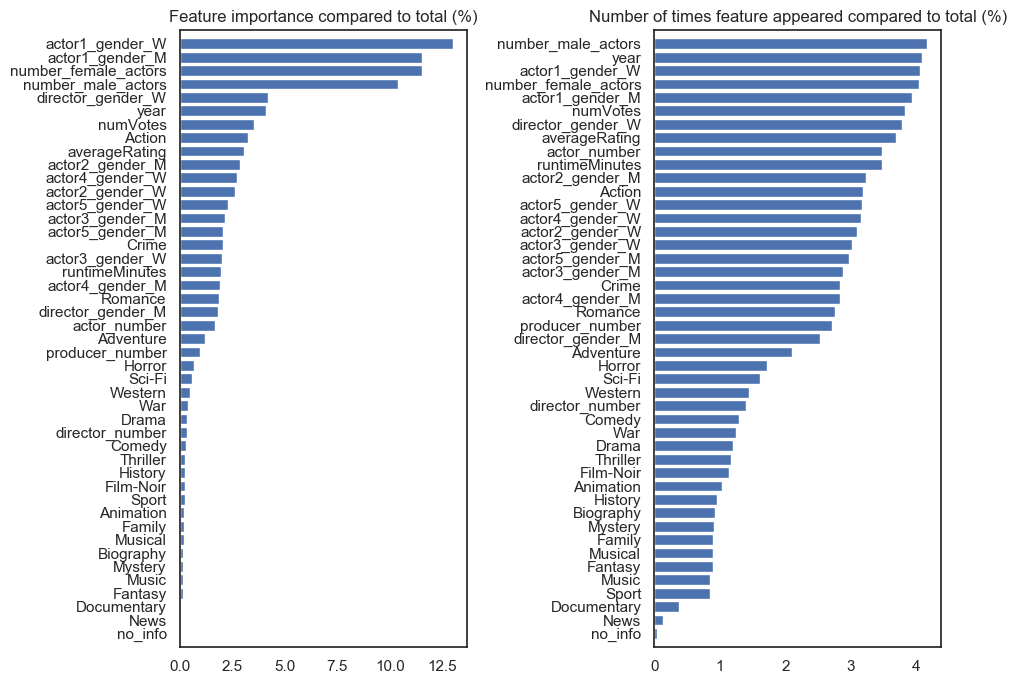

In [70]:
D=dict(sorted(total_feat_imp.items(),key=lambda item: item[1]))
total = sum(D.values())
D = {k: v / total*100 for k, v in D.items()}

D2=dict(sorted(total_feat_appearances.items(),key=lambda item: item[1]))
total = sum(D2.values())
D2 = {k: v / total*100 for k, v in D2.items()}

fig,ax=plt.subplots(1,2,figsize=(10,7))
ax[0].barh(range(len(D)),list(D.values()),align='center')
ax[0].set_ylim(-1,45)
ax[1].barh(range(len(D2)),list(D2.values()),align='center')
ax[1].set_ylim(-1,45)
plt.setp(ax[0],yticks=range(len(D)),yticklabels=list(D.keys()),title='Feature importance compared to total (%)')
plt.setp(ax[1],yticks=range(len(D2)),yticklabels=list(D2.keys()),title='Number of times feature appeared compared to total (%)')


plt.tight_layout()


The most important features were those related to gender, followed by release year, number of votes and averageRating. Some genres were also used in some of the trees.

# 9. Classification with recursive feature eliminator and logistic regression

## 9.1 Normalization of data

The order of magnitude is different for different features. Some features have value ranging from 0 to 10 while others had range of thousands. Furthermore, the standard deviation of the features was different from each other.

Because of this difference, some models have a harder time learning appropriate weights for each feature. Without feature scaling, the model will pay too much attention to features that have a higher magnitude.

To correct this, the continous features were processed with a Standard scaler, which applies the following transformation to each column:

$z=\frac{(x-mean(column))}{std(column)}$

In [71]:
columns_to_standardize=['year','runtimeMinutes','averageRating','numVotes','actor_number','director_number','producer_number',
                       'number_female_actors','number_male_actors']

X_train_nonstandardized_columns=X_train.drop(columns=columns_to_standardize)
X_test_nonstandardized_columns=X_test.drop(columns=columns_to_standardize)


scaler = preprocessing.StandardScaler()
scaler.fit(X_train[columns_to_standardize])
scaled_X_train=pd.DataFrame(scaler.transform(X_train[columns_to_standardize]),columns=columns_to_standardize)
scaled_X_train.index=X_train_nonstandardized_columns.index
scaled_X_test=pd.DataFrame(scaler.transform(X_test[columns_to_standardize]),columns=columns_to_standardize)
scaled_X_test.index=X_test_nonstandardized_columns.index

X_train=pd.concat([scaled_X_train,X_train_nonstandardized_columns],axis=1)
X_test=pd.concat([scaled_X_test,X_test_nonstandardized_columns],axis=1)

## 9.2 Recursive feature eliminator

As was observed on the previous sections, some variables were not useful to predict the outcome of the test. Furthermore, some features were very correlated between themselves, meaning them did not add a lot of information to the classification problem. To eliminate features which may not be useful for the classification with a logistic regression, we perform a Recursize Feature Elimination (RFE)

RFE is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [72]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
#print(rfe.support_)
#print(rfe.ranking_)

In [73]:
#These are the eliminated columns:

md('We chose to keep only the 20 most important features. The eliminated features were:'+', '.join(list(columns[~rfe.support_])))

We chose to keep only the 20 most important features. The eliminated features were:runtimeMinutes, averageRating, numVotes, actor_number, director_number, producer_number, actor2_gender_W, actor3_gender_M, actor4_gender_W, actor5_gender_W, director_gender_M, Documentary, Short, Animation, Comedy, Romance, History, Horror, Fantasy, Drama, Adventure, Music, Mystery, Sci-Fi, Thriller, Adult, News

These features either were not very good in the classification problem or were very correlated to other features.

In [74]:
#Keeping only selected columns
cols=columns[rfe.support_]
X_train_processed=X_train[cols]
X_test_processed=X_test[cols]

## 9.3 Logistical model

By using a logistical model, it is possible to see how much each variable influences the result of the output. Coefficients with higher module means a higher influence.

Negative coefficients means the feature is decreasing the chance of classifying as true (pass the test). Positive coefficients means the feature is increasing the chance of classifying as true.

Lower p_values means a higher probability that the coefficient values are significant to the analysis (the slope is different than 0).


In [75]:
logit_model=sm.Logit(y_train.values.reshape(-1,1),X_train_processed);
result=logit_model.fit();
p_values=result.summary2().tables[1]['P>|z|'];
result.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.534603
         Iterations 6


Coef.  Std.Err.          z         P>|z|    [0.025  \
year                  0.219161  0.033698   6.503678  7.837943e-11  0.153114   
number_female_actors  0.575458  0.054311  10.595551  3.124948e-26  0.469010   
number_male_actors   -0.586924  0.053580 -10.954105  6.350296e-28 -0.691940   
actor1_gender_M      -0.186194  0.069547  -2.677226  7.423452e-03 -0.322504   
actor1_gender_W       1.307051  0.130086  10.047618  9.411498e-24  1.052088   
actor2_gender_M      -0.104553  0.085717  -1.219744  2.225620e-01 -0.272556   
actor3_gender_W      -0.209539  0.104227  -2.010417  4.438706e-02 -0.413819   
actor4_gender_M       0.362539  0.080891   4.481812  7.401207e-06  0.203995   
actor5_gender_M       0.374121  0.082047   4.559851  5.119004e-06  0.213312   
director_gender_W     0.851092  0.170434   4.993679  5.923990e-07  0.517048   
Family                0.216552  0.144363   1.500054  1.336003e-01 -0.066394   
Action               -0.300004  0.084963  -3.530991  4.140058e-04 -0.466528   
Crime                -0.264401  0.093841  -2.817539  4.839321e-03 -0.448326   
Biography            -0.190742  0.140084  -1.361626  1.733161e-01 -0.465302   
Western              -1.203389  0.413823  -2.907981  3.637707e-03 -2.014467   
War                  -0.279557  0.226809  -1.232569  2.177366e-01 -0.724094   
Musical               0.375689  0.215842   1.740574  8.175820e-02 -0.047353   
Film-Noir            -0.256310  0.374671  -0.684094  4.939156e-01 -0.990652   
Sport                -0.492353  0.268017  -1.837019  6.620714e-02 -1.017658   
no_info              -0.656604  1.427815  -0.459866  6.456124e-01 -3.455069   

                        0.975]  
year                  0.285208  
number_female_actors  0.681906  
number_male_actors   -0.481909  
actor1_gender_M      -0.049884  
actor1_gender_W       1.562014  
actor2_gender_M       0.063450  
actor3_gender_W      -0.005259  
actor4_gender_M       0.521082  
actor5_gender_M       0.534930  
director_gender_W     1.185136  
Family                0.499497  
Action               -0.133479  
Crime                -0.080476  
Biography             0.083818  
Western              -0.392311  
War                   0.164979  
Musical               0.798731  
Film-Noir             0.478032  
Sport                 0.032951  
no_info               2.141862

In [76]:
keep_cols=p_values<0.1

In [77]:
# We elliminate the p_values that were lower than 0.1
cols=cols[keep_cols]
X_train_processed=X_train_processed[cols]
X_test_processed=X_test_processed[cols]

From the columns above, only the ones where the p-value was lower than 0.1 were kept. The logistical model was then calculated with these remaning variables and is shown below.

In [78]:
logit_model=sm.Logit(y_train.values.reshape(-1,1),X_train_processed)
result=logit_model.fit()
result.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.535388
         Iterations 6


Coef.  Std.Err.          z         P>|z|    [0.025  \
year                  0.223187  0.032733   6.818393  9.206470e-12  0.159031   
number_female_actors  0.613091  0.046277  13.248383  4.610326e-40  0.522391   
number_male_actors   -0.620574  0.046118 -13.456313  2.826724e-41 -0.710963   
actor1_gender_M      -0.213734  0.065575  -3.259400  1.116482e-03 -0.342257   
actor1_gender_W       1.195334  0.101232  11.807810  3.557040e-32  0.996922   
actor3_gender_W      -0.285141  0.085770  -3.324488  8.858113e-04 -0.453247   
actor4_gender_M       0.391591  0.076186   5.139945  2.748194e-07  0.242269   
actor5_gender_M       0.406527  0.077440   5.249585  1.524420e-07  0.254748   
director_gender_W     0.829494  0.169653   4.889364  1.011623e-06  0.496981   
Action               -0.304978  0.084011  -3.630193  2.832092e-04 -0.469637   
Crime                -0.290038  0.092215  -3.145223  1.659601e-03 -0.470777   
Western              -1.206051  0.413418  -2.917270  3.531099e-03 -2.016335   
Musical               0.370657  0.214576   1.727396  8.409653e-02 -0.049903   
Sport                -0.541554  0.265212  -2.041968  4.115473e-02 -1.061361   

                        0.975]  
year                  0.287343  
number_female_actors  0.703792  
number_male_actors   -0.530185  
actor1_gender_M      -0.085210  
actor1_gender_W       1.393746  
actor3_gender_W      -0.117035  
actor4_gender_M       0.540912  
actor5_gender_M       0.558306  
director_gender_W     1.162008  
Action               -0.140318  
Crime                -0.109299  
Western              -0.395767  
Musical               0.791217  
Sport                -0.021748

Using these selected parameters, a parameter optimization was applied to the logistic model, where the C regularization parameter was tested in a range from -1 to 1.

In [79]:
# Using the model to predict
model = LogisticRegression()
param_search = {'C' : [10**x for x in np.logspace(-1,1,100)]}
gsearch_logit = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='recall')
gsearch_logit.fit(X_train_processed, y_train['Pass'])

best_params=gsearch_logit.best_estimator_

y_pred = gsearch_logit.predict(X_test_processed)


In [80]:
md('The optimal tree had the following hyperparameter: <br> C= {}'.format(best_params.C)+\
  '<br> This model had an accuracy on the test set equal to **{:.1f}%**'.format(100*accuracy_score(y_pred, y_test)))

The optimal tree had the following hyperparameter: <br> C= 1.2589254117941673<br> This model had an accuracy on the test set equal to **73.7%**

The confusion matrix for this model is shown below:

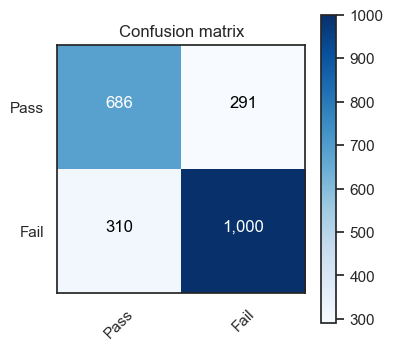

In [81]:
cm = confusion_matrix(np.array(y_test), y_pred)
plot_confusion_matrix(cm,['Pass','Fail'],normalize=False)

And the roc curve is also shown:

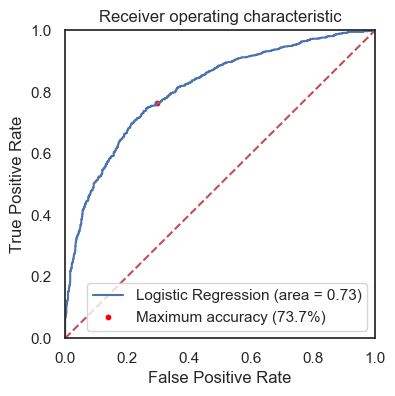

In [82]:
TP, FP, TN, FN=perf_measure(list(y_test['Pass']),list([int(y) for y in y_pred]))
FPR=FP/(TN+FP)
TPR=TP/(FN+TP)

logit_roc_auc = roc_auc_score(y_test, gsearch_logit.predict(X_test_processed))
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, gsearch_logit.predict_proba(X_test_processed)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_logit, tpr_logit, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.scatter(FPR,TPR,color='red',s=10,label='Maximum accuracy ({:.1f}%)'.format(100*accuracy_score(y_pred, y_test)))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 10. Classification with dimensionality reduction and Neural Network

## 10.1 Dimensionality reduction

A dataset has a very big number of features describing the state of the turbine. However, many of them will measure related properties and are redundant. Since many of them are redundant, it is possible to summarize the state of the turbine with fewer features. 

These new features are constructed using the old ones; for example, a new characteristic might be computed as the number of female actresses minus the number of male actors.

There are multiple possible ways to create these new features, PCA is a method that finds the best possible new features (the ones that explain the most variation in the data).

In more technical terms, what the PCA algorithm does is:
*	It creates features that are orthogonal to each another (don’t have any correlation to one another) using a linear combination of the original features;
*	It orders these new features in order of importance (How much of the variance in the data it explains);
*	It selects only the most important features;
 

The reduction of the number of features is useful since:
*	It reduces the computational time of the model;
*	It leads to better performance for the learning algorithm by removing redundant, obsolete and highly correlated features.

On the other hand, it has some drawbacks:
*	Since the new features are a combination of all other variables, they don’t have a concrete physical meaning and it becomes difficult to interpret these new features.

The PCA model took the 47 features which were selected in the previous sections and converted them into 30 features, which were fed to the machine learning model. The importance of these new features is shown below, where each column represents the % of the original variance that is explained by each principal component.

In [260]:
def create_model2(layer1,layer2,layer3,dropout1,dropout2,dropout3,learning_rate):
    initializer=tf.keras.initializers.GlorotUniform()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(layer1,input_dim=X_train_reduced_dim.shape[1], activation='relu',kernel_initializer=initializer))
    model.add(tf.keras.layers.Dropout(dropout1))
    model.add(tf.keras.layers.Dense(layer2, activation='relu',kernel_initializer=initializer))
    model.add(tf.keras.layers.Dropout(dropout2))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
def scheduler2(epoch, lr):
   if epoch < 10:
        return lr
   else:
        return lr * tf.math.exp(-0.1)
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 5e-2 less"
        min_delta=5e-3,
        # "no longer improving" being further defined as "for at least 15 epochs"
        patience=15),tf.keras.callbacks.LearningRateScheduler(scheduler2)]


In [261]:
import itertools

from numpy.random import seed



dim=30
l1=70
l2=25
d1=.3
d2=.3
lr=.005
bs=400

pca_model = PCA(dim).fit(X_train)
X_train_reduced_dim=pd.DataFrame(pca_model.transform(X_train))
X_test_reduced_dim=pd.DataFrame(pca_model.transform(X_test))


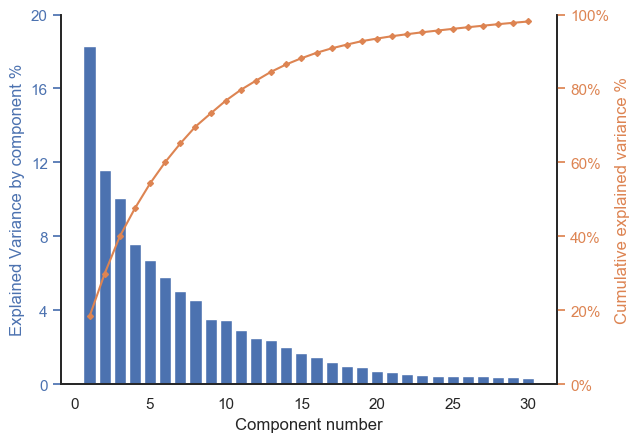

In [262]:
from matplotlib.ticker import PercentFormatter

explained_var=pca_model.explained_variance_ratio_
cumul_var=explained_var.cumsum()


fig, ax = plt.subplots()


ax.bar(np.arange(len(explained_var))+1,explained_var*100, color="C0");
ax2 = ax.twinx()
ax2.plot(np.arange(len(explained_var))+1,cumul_var*100, color="C1", marker="D", ms=3)
ax2.yaxis.set_major_formatter(PercentFormatter())
#ax.set_title('% of total variance explained by each component')
ax.set_xlabel('Component number')
ax.set_ylabel('Explained Variance by component %',color='C0')
ax2.set_ylabel('Cumulative explained variance %',color='C1')
ax2.set_ylim((0,100))
ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
ax.set_yticks(np.linspace(ax.get_yticks()[0], ax.get_yticks()[-1], len(ax2.get_yticks())));


for axis in [ax,ax2]:
    axis.spines['top'].set_visible(False)


In [263]:
md('The 30 components explain **{:.1f}%** of the total variance of the 47 original variables.<br>'.format(100*explained_var.sum())+\
'It is also possible to see that the first 5 components explain more than half of the original variance.')

The 30 components explain **98.1%** of the total variance of the 47 original variables.<br>It is also possible to see that the first 5 components explain more than half of the original variance.

## 10.2 Neural Network

Neural networks are inspired in the way the human brain works. They are composed of multiple neurons. Each neuron receives signals from other neurons and, by weighting the importance of the received signals, fires a new signal to a subsequent layer of neurons.

Each layer processes the signals sent by the previous layer and sends new signals to the next layer, until the final layer (the output layer) sends a signal with the classification of the model.

By considering the accuracy obtained in a train set, the model updates the weights used by the neurons to improve the performance of the model.

On one hand, the model is very adaptive and can work for many different problems. On the other, there are a large number of hyperparameters that need to be optimized and the method is computationally expensive.


A Neural Network with one input layer, one output layer and two hidden layers was trained. The hyperparameters were tuned in two ways:
1. By optimization through computational loops.
2. By hand, where the results of the loss curve were analyzed to better select the adequate parameters.

The neural network was built using the *keras* library.

In [264]:
#Setting the seed to get reproducible results
seed(13)
tf.random.set_seed(13)

#Training the neural network on the training set and calculating the score on the test set.
model=create_model2(l1, l2,l3,d1,d2,d3,lr)
history=model.fit(X_train_reduced_dim, y_train, epochs=1000, batch_size=bs,verbose=0,
                      validation_data=(X_test_reduced_dim, y_test),callbacks=callbacks);
score_model=model.evaluate(X_test_reduced_dim,y_test)[1];

72/72 [==============================] - 1s 10ms/step - loss: 0.5297 - accuracy: 0.7503


In [269]:
md('The optimal Neural Network ocurred when the dimension was reduced to **{}** features.<br>'.format(dim)+\
   'The Network had 2 hidden layers, each layer having **{}** and **{}** nodes.'.format(l1,l2)+\
  'The dropout rate for each hidden layer was respectively: **{:.0f}%** and **{:.0f}%**.<br>'.format(100*d1,100*d2) +\
    'The learning rate was equal to **{:.1e}** and the batch size was equal to **{:.0f}**.<br>'.format(lr,bs)+\
   'The network used the relu activation function for the hidden layers and the sigmoid function for the output layer.'+\
   'The network was optimized with Adam (using the default parameters) and the weights were initialized with the Glorot Uniform method.'+\
  'The accuracy of this model was equal to **{:.2f}%.**'.format(100*score_model))

The optimal Neural Network ocurred when the dimension was reduced to **30** features.<br>The Network had 2 hidden layers, each layer having **70** and **25** nodes.The dropout rate for each hidden layer was respectively: **30%** and **30%**.<br>The learning rate was equal to **5.0e-03** and the batch size was equal to **400**.<br>The network used the relu activation function for the hidden layers and the sigmoid function for the output layer.The network was optimized with Adam (using the default parameters) and the weights were initialized with the Glorot Uniform method.The accuracy of this model was equal to **75.03%.**

The training and test accuracy and losses are shown below. The model stopped early because the test loss was beggining to rise (a patience of 15 epochs was used). If the model did not stop early, where the model could start to overfit, the training accuracy would get better while the test accuracy would decrease.

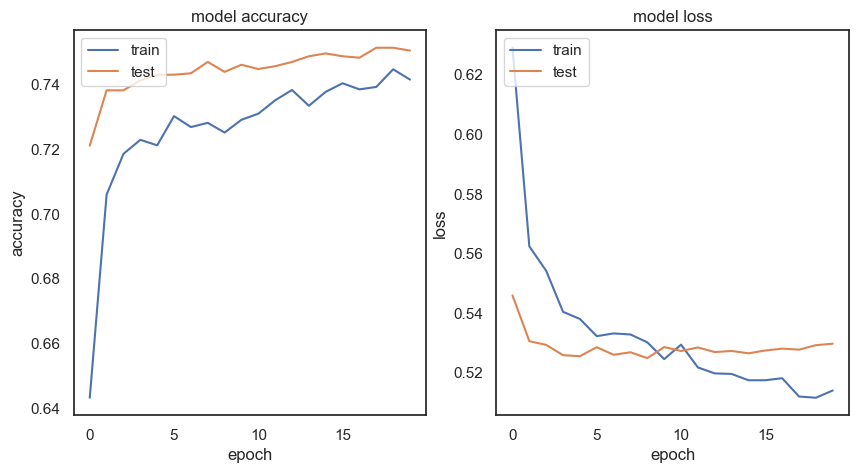

In [266]:
# list all data in history
# summarize history for accuracy
fig,axs=plt.subplots(1,2,figsize=(10,5))
axs[0].plot(history.history['accuracy']);
axs[0].plot(history.history['val_accuracy']);
axs[0].set_title('model accuracy');
axs[0].set_ylabel('accuracy');
axs[0].set_xlabel('epoch');
axs[0].legend(['train', 'test'], loc='upper left');

# summarize history for loss
plt.plot(history.history['loss']);
plt.plot(history.history['val_loss']);
plt.title('model loss');
plt.ylabel('loss');
plt.xlabel('epoch');
plt.legend(['train', 'test'], loc='upper left');
plt.show();

The confusion matrix and the ROC curve for the Neural Network are shown below. Out of the 2287 samples in the test set, 1716 were correctly predicted.

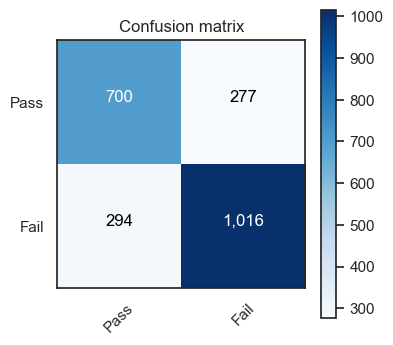

In [199]:
y_pred=model.predict(X_test_reduced_dim)
y_pred = [round(x[0]) for x in y_pred]
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.array(y_test), y_pred)
plot_confusion_matrix(cm,['Pass','Fail'],normalize=False)

72/72 [==============================] - 1s 9ms/step - loss: 0.5297 - accuracy: 0.7503


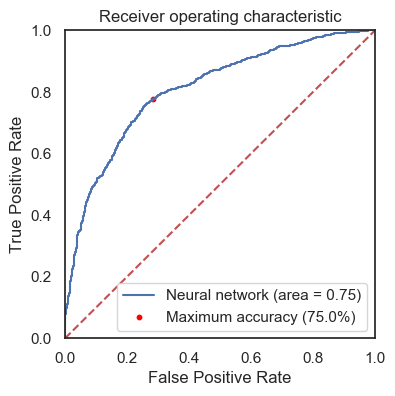

In [267]:
TP, FP, TN, FN=perf_measure(list(y_test['Pass']),list([int(round(float(y))) for y in model.predict_proba(X_test_reduced_dim)]));
FPR=FP/(TN+FP);
TPR=TP/(FN+TP);

roc_auc = roc_auc_score(y_test, y_pred);
fpr, tpr, thresholds = roc_curve(y_test, [float(x) for x in model.predict_proba(X_test_reduced_dim)]);
plt.figure(figsize=(4,4))
plt.plot(fpr, tpr, label='Neural network (area = %0.2f)' % roc_auc)
plt.scatter(FPR,TPR,color='red',s=10,label='Maximum accuracy ({:.1f}%)'.format(100*model.evaluate(X_test_reduced_dim,y_test)[1]))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 11. OTHER MODELS

Other models, such as Random Forest Classifier, Gaussian Naive Bayes, K-Nearest Neighbors, Linear Discriminant Analysis, Quadratic Discriminant Analysis, Gradient Boosting Classifier and Adaboost were also studied but will not be shown in the notes-only notebook to keep the analysis brief. If the reader is curious, these other models and their hyperparameter optimization will be shown in the code+notes notebook.

In [ ]:
pca_model = PCA(dim).fit(X_train)
X_train_reduced_dim=pd.DataFrame(pca_model.transform(X_train))
X_test_reduced_dim=pd.DataFrame(pca_model.transform(X_test))

# Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
# Using the model to predict
model = RandomForestClassifier()
param_search = {'n_estimators':[100],'max_depth' : np.arange(5,7),'criterion':['gini','entropy'],'min_samples_split':[8,10,12],
                'min_samples_leaf':[5,8,10],'min_impurity_decrease':[0.0001,0.00001],'class_weight':['balanced']}
gsearch_rfc = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='accuracy')
gsearch_rfc.fit(X_train_reduced_dim, y_train['Pass'])

best_params=gsearch_rfc.best_estimator_

print('best parameters={}'.format(best_params) )

y_pred = gsearch_rfc.predict(X_test_reduced_dim)
print('Accuracy on test set: {:.2f}'.format(100*accuracy_score(y_pred, y_test)))

best parameters=RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_impurity_decrease=0.0001,
                       min_samples_leaf=10, min_samples_split=10)
Accuracy on test set: 72.72


In [86]:
conf_matr = confusion_matrix(np.array(y_test), y_pred)
print(conf_matr)

[[751 226]
 [398 912]]


In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.65      0.77      0.71       977
        True       0.80      0.70      0.75      1310

    accuracy                           0.73      2287
   macro avg       0.73      0.73      0.73      2287
weighted avg       0.74      0.73      0.73      2287



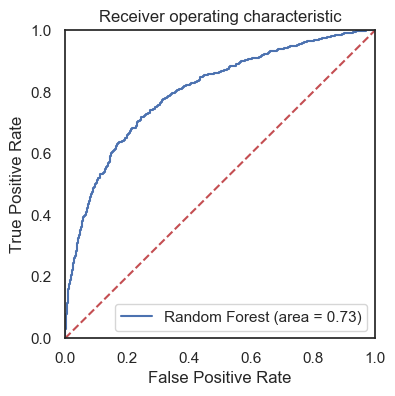

In [88]:
rfc_roc_auc = roc_auc_score(y_test, gsearch_rfc.predict(X_test_reduced_dim))
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, gsearch_rfc.predict_proba(X_test_reduced_dim)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RFC_ROC')
plt.show()

# Gaussian Naive Bayes

In [89]:
from sklearn.naive_bayes import GaussianNB
# Using the model to predict
model = GaussianNB()
param_search = {}
gsearch_GNB = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='accuracy')
gsearch_GNB.fit(X_train_reduced_dim, y_train['Pass'])

best_params=gsearch_GNB.best_estimator_

print('best parameters={}'.format(best_params) )

y_pred = gsearch_GNB.predict(X_test_reduced_dim)
print('Accuracy on test set: {:.2f}'.format(100*accuracy_score(y_pred, y_test)))

best parameters=GaussianNB()
Accuracy on test set: 69.65


In [90]:
conf_matr = confusion_matrix(np.array(y_test), y_pred)
print(conf_matr)

[[712 265]
 [429 881]]


In [91]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.62      0.73      0.67       977
        True       0.77      0.67      0.72      1310

    accuracy                           0.70      2287
   macro avg       0.70      0.70      0.69      2287
weighted avg       0.71      0.70      0.70      2287



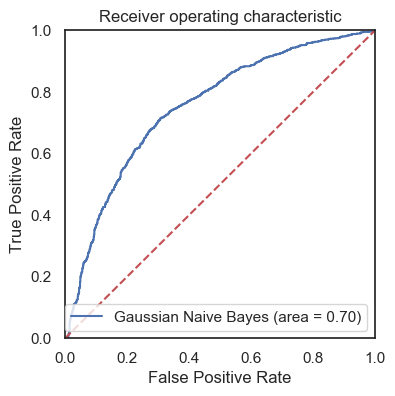

In [92]:
GNB_roc_auc = roc_auc_score(y_test, gsearch_GNB.predict(X_test_reduced_dim))
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gsearch_GNB.predict_proba(X_test_reduced_dim)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_gnb, tpr_gnb, label='Gaussian Naive Bayes (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GNB_ROC')
plt.show()

# K-Nearest Neighbors

In [93]:
from sklearn.neighbors import KNeighborsClassifier
# Using the model to predict
model = KNeighborsClassifier()
param_search = {'n_neighbors':[1,5,10,50,100,200,500],'weights':['uniform','distance'],'p':[1,2]}
gsearch_KNN = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='accuracy')
gsearch_KNN.fit(X_train_reduced_dim, y_train['Pass'])

best_params=gsearch_KNN.best_estimator_

print('best parameters={}'.format(best_params) )

y_pred = gsearch_KNN.predict(X_test_reduced_dim)
print('Accuracy on test set: {:.2f}'.format(100*accuracy_score(y_pred, y_test)))

best parameters=KNeighborsClassifier(n_neighbors=100, p=1)
Accuracy on test set: 72.67


In [94]:
conf_matr = confusion_matrix(np.array(y_test), y_pred)
print(conf_matr)

[[ 621  356]
 [ 269 1041]]


In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.64      0.67       977
        True       0.75      0.79      0.77      1310

    accuracy                           0.73      2287
   macro avg       0.72      0.72      0.72      2287
weighted avg       0.72      0.73      0.72      2287



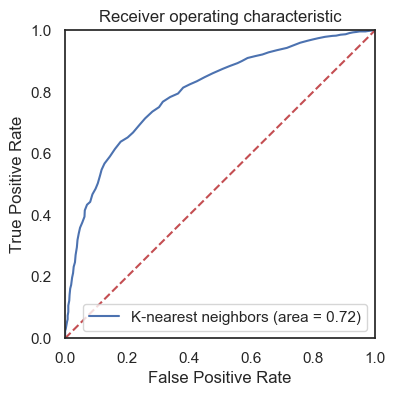

In [96]:
KNN_roc_auc = roc_auc_score(y_test, gsearch_KNN.predict(X_test_reduced_dim))
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, gsearch_KNN.predict_proba(X_test_reduced_dim)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_knn, tpr_knn, label='K-nearest neighbors (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

# LDA

In [97]:
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis as LDA
# Using the model to predict
model = LDA()
param_search = {'solver':['svd','lsqr','eigen']}
gsearch_LDA = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='accuracy')
gsearch_LDA.fit(X_train_reduced_dim, y_train['Pass'])

best_params=gsearch_LDA.best_estimator_

print('best parameters={}'.format(best_params) )

y_pred = gsearch_LDA.predict(X_test_reduced_dim)
print('Accuracy on test set: {:.2f}'.format(100*accuracy_score(y_pred, y_test)))

best parameters=LinearDiscriminantAnalysis()
Accuracy on test set: 74.33


In [98]:
conf_matr = confusion_matrix(np.array(y_test), y_pred)
print(conf_matr)
print(classification_report(y_test, y_pred))

[[708 269]
 [318 992]]
              precision    recall  f1-score   support

       False       0.69      0.72      0.71       977
        True       0.79      0.76      0.77      1310

    accuracy                           0.74      2287
   macro avg       0.74      0.74      0.74      2287
weighted avg       0.75      0.74      0.74      2287



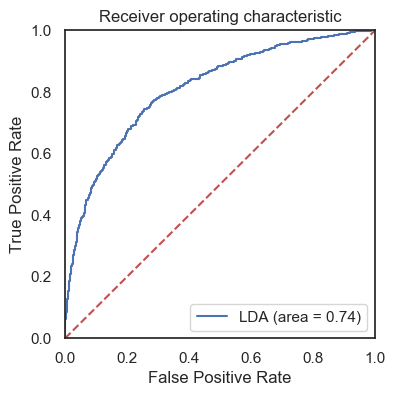

In [99]:
LDA_roc_auc = roc_auc_score(y_test, gsearch_LDA.predict(X_test_reduced_dim))
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, gsearch_LDA.predict_proba(X_test_reduced_dim)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_lda, tpr_lda, label='LDA (area = %0.2f)' % LDA_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LDA_ROC')
plt.show()

# QDA

In [100]:
from sklearn.discriminant_analysis  import QuadraticDiscriminantAnalysis as QDA
# Using the model to predict
model = QDA()
param_search = {'reg_param':[0,0.1,0.2,0.3]}
gsearch_QDA = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='accuracy')
gsearch_QDA.fit(X_train_reduced_dim, y_train['Pass'])

best_params=gsearch_QDA.best_estimator_

print('best parameters={}'.format(best_params) )

y_pred = gsearch_QDA.predict(X_test_reduced_dim)
print('Accuracy on test set: {:.2f}'.format(100*accuracy_score(y_pred, y_test)))

best parameters=QuadraticDiscriminantAnalysis(reg_param=0.2)
Accuracy on test set: 73.28


In [101]:
conf_matr = confusion_matrix(np.array(y_test), y_pred)
print(conf_matr)
print(classification_report(y_test, y_pred))

[[721 256]
 [355 955]]
              precision    recall  f1-score   support

       False       0.67      0.74      0.70       977
        True       0.79      0.73      0.76      1310

    accuracy                           0.73      2287
   macro avg       0.73      0.73      0.73      2287
weighted avg       0.74      0.73      0.73      2287



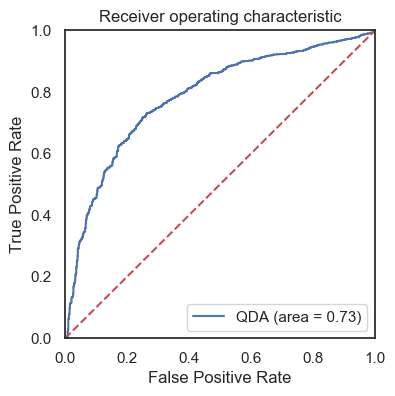

In [102]:
QDA_roc_auc = roc_auc_score(y_test, gsearch_QDA.predict(X_test_reduced_dim))
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, gsearch_QDA.predict_proba(X_test_reduced_dim)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_qda, tpr_qda, label='QDA (area = %0.2f)' % QDA_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('QDA_ROC')
plt.show()

# Gradient Boosting Classifier

In [120]:
from sklearn.ensemble  import GradientBoostingClassifier as GBC
# Using the model to predict
model = GBC()
param_search = {'loss':['exponential'],'learning_rate':[0.03,0.04],'min_samples_split':[195],
                'max_depth':[3],'min_impurity_decrease':[0],'n_estimators':[200,250,300,350],
                'criterion':['friedman_mse']}
gsearch_GBC = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='accuracy',verbose=1)
gsearch_GBC.fit(X_train_reduced_dim, y_train['Pass'])

best_params=gsearch_GBC.best_estimator_

print('best parameters={}'.format(best_params))

y_pred = gsearch_GBC.predict(X_test_reduced_dim)
print('Accuracy on test set: {:.2f}'.format(100*accuracy_score(y_pred, y_test)))

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:  3.9min finished


best parameters=GradientBoostingClassifier(learning_rate=0.03, loss='exponential',
                           min_impurity_decrease=0, min_samples_split=195,
                           n_estimators=300)
Accuracy on test set: 73.07


In [116]:
gsearch_GBC.best_estimator_.max_depth

3

In [105]:
gsearch_GBC.grid_scores_

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

In [ ]:
conf_matr = confusion_matrix(np.array(y_test), y_pred)
print(conf_matr)
print(classification_report(y_test, y_pred))

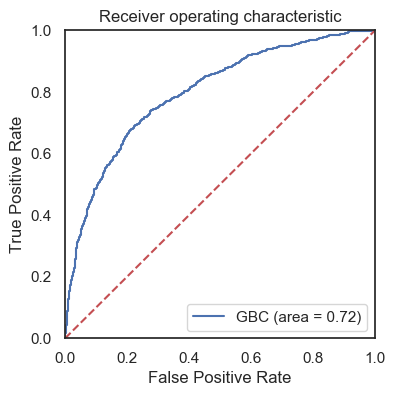

In [778]:
GBC_roc_auc = roc_auc_score(y_test, gsearch_GBC.predict(X_test_reduced_dim))
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, gsearch_GBC.predict_proba(X_test_reduced_dim)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_gbc, tpr_gbc, label='GBC (area = %0.2f)' % GBC_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBC_ROC')
plt.show()

# Neural Network

In [503]:
from sklearn.neural_network import MLPClassifier
# Using the model to predict
model = MLPClassifier()
param_search = {'hidden_layer_sizes':[(40,20)],'alpha':[5*1e-1,1e0,7*1e-1],'batch_size':[200,1000],
               'learning_rate_init':[0.01,0.05,0.1],'beta_2':[0.99,0.999],'beta_1':[0.99]}
gsearch_MLP = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='accuracy')
gsearch_MLP.fit(X_train_reduced_dim, y_train['Pass'])

best_params=gsearch_MLP.best_estimator_

print('best parameters={}'.format(best_params) )

y_pred = gsearch_MLP.predict(X_test_reduced_dim)
print('Accuracy on test set: {:.2f}'.format(100*accuracy_score(y_pred, y_test)))

best parameters=MLPClassifier(alpha=1.0, batch_size=5000, beta_1=0.99,
              hidden_layer_sizes=(40, 20), learning_rate_init=0.1)
Accuracy on test set: 73.72


In [504]:
conf_matr = confusion_matrix(np.array(y_test), y_pred)
print(conf_matr)
print(classification_report(y_test, y_pred))

[[ 683  294]
 [ 307 1003]]
              precision    recall  f1-score   support

       False       0.69      0.70      0.69       977
        True       0.77      0.77      0.77      1310

    accuracy                           0.74      2287
   macro avg       0.73      0.73      0.73      2287
weighted avg       0.74      0.74      0.74      2287



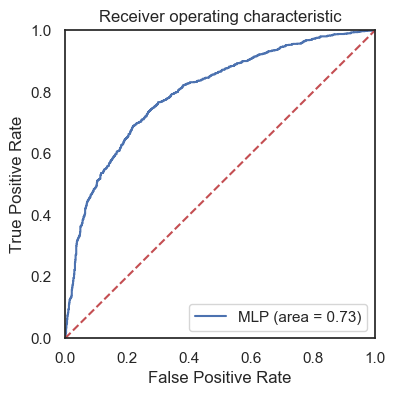

In [505]:
MLP_roc_auc = roc_auc_score(y_test, gsearch_MLP.predict(X_test_reduced_dim))
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(y_test, gsearch_MLP.predict_proba(X_test_reduced_dim)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_mlp, tpr_mlp, label='MLP (area = %0.2f)' % MLP_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('MLP_ROC')
plt.show()

# Adaboost

In [ ]:
param_search = {'max_depth' : np.arange(10)[1:],'criterion':['gini','entropy'],'min_samples_split':[200,500,1000],
                'min_samples_leaf':[100,150,200],'min_impurity_decrease':[0,0.0001]}

In [764]:
max_depth_l=np.arange(8)[1:]
min_samples_split=[100,200,500,1000]
models=[]
for max_depth, msp in itertools.product(max_depth_l,min_samples_split):
    model=DecisionTreeClassifier(max_depth=max_depth,min_samples_split=msp)
    models=models+[model]


In [765]:
pca_model = PCA(30).fit(X_train)
X_train_reduced_dim=pd.DataFrame(pca_model.transform(X_train))
X_test_reduced_dim=pd.DataFrame(pca_model.transform(X_test))

In [766]:
from sklearn.ensemble import AdaBoostClassifier
# Using the model to predict

model = AdaBoostClassifier()
param_search = {'n_estimators':[100],
                'base_estimator':models,
                'learning_rate':[0.02,0.05,0.1,0.2,0.5,1]}
gsearch_ada = GridSearchCV(estimator=model, cv=2,
                        param_grid=param_search,scoring='accuracy')
gsearch_ada.fit(X_train_reduced_dim, y_train['Pass'])

best_params=gsearch_ada.best_estimator_

print('best parameters={}'.format(best_params) )

y_pred = gsearch_ada.predict(X_test_reduced_dim)
print('Accuracy on test set: {:.2f}'.format(100*accuracy_score(y_pred, y_test)))

best parameters=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                         min_samples_split=200),
                   learning_rate=0.02, n_estimators=100)
Accuracy on test set: 72.93


In [122]:
conf_matr = confusion_matrix(np.array(y_test), y_pred)
print(conf_matr)
print(classification_report(y_test, y_pred))

[[ 651  326]
 [ 290 1020]]
              precision    recall  f1-score   support

       False       0.69      0.67      0.68       977
        True       0.76      0.78      0.77      1310

    accuracy                           0.73      2287
   macro avg       0.72      0.72      0.72      2287
weighted avg       0.73      0.73      0.73      2287



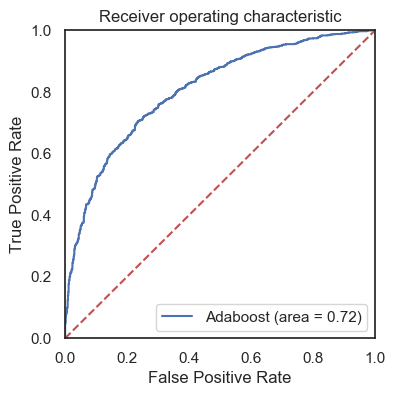

In [752]:
ada_roc_auc = roc_auc_score(y_test, gsearch_ada.predict(X_test_reduced_dim))
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, gsearch_ada.predict_proba(X_test_reduced_dim)[:,1])
plt.figure(figsize=(4,4))
plt.plot(fpr_ada, tpr_ada, label='Adaboost (area = %0.2f)' % ada_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ada_ROC')
plt.show()

In [182]:
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

def create_model_2layer(layer1,layer2,dropout1,dropout2,learning_rate):
    initializer=tf.keras.initializers.GlorotUniform()
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(layer1,input_dim=X_train_reduced_dim.shape[1], activation='relu',kernel_initializer=initializer))
    model.add(tf.keras.layers.Dropout(dropout1))
    model.add(tf.keras.layers.Dense(layer2, activation='relu',kernel_initializer=initializer))
    model.add(tf.keras.layers.Dropout(dropout2))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

def scheduler(epoch, lr):
   if epoch < 10:
        return lr
   else:
        return lr * tf.math.exp(-0.1)
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 5e-3 less"
        min_delta=5e-3,
        # "no longer improving" being further defined as "for at least 15 epochs"
        patience=15),tf.keras.callbacks.LearningRateScheduler(scheduler)]


In [ ]:
# Hyperparameter tuning for the Neural Network model

#Setting tensorflow and python seeds for reproducible results
from numpy.random import seed
seed(13)

tf.random.set_seed(13)

#Specifying hyperparamters range
dim_l=[30]
layer1_possible=[70]
layer2_possible=[25]
dropout1_psbl=[.3]
dropout2_psbl=[.3]
lr_psbl=[0.005,0.004,0.003,0.002,0.001]
batch_size_l=[200,300,400,500,700,1000]
scores=[]

# For each combination of the hyperparameters, calculate the accuracy
for dim,l1, l2,d1,d2,lr,bs in itertools.product(dim_l,layer1_possible,layer2_possible,
                                                   dropout1_psbl,dropout2_psbl,lr_psbl,batch_size_l):
    t0=time.time()
    pca_model = PCA(dim).fit(X_train)
    X_train_reduced_dim=pd.DataFrame(pca_model.transform(X_train))
    X_test_reduced_dim=pd.DataFrame(pca_model.transform(X_test))
    model=create_model_2layer(l1, l2,d1,d2,lr)
    
    history=model.fit(X_train_reduced_dim, y_train, epochs=1000, batch_size=bs,verbose=0,
                      validation_data=(X_test_reduced_dim, y_test),callbacks=callbacks);
    score_model=model.evaluate(X_test_reduced_dim,y_test)[1]
    scores.append({'parameters':[dim,l1, l2,d1,d2,lr,bs],'score':score_model})
    print(dim,l1, l2,d1,d2,lr,bs,end=' in ')
    print('{:.1f} seconds'.format(time.time()-t0))
score_df=pd.DataFrame.from_dict(scores)